# Predicting Student Admissions with Neural Networks
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [2]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data[:10]

admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
5      1  760  3.00     2
6      1  560  2.98     1
7      0  400  3.08     2
8      1  540  3.39     3
9      0  700  3.92     2

## Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

In [3]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

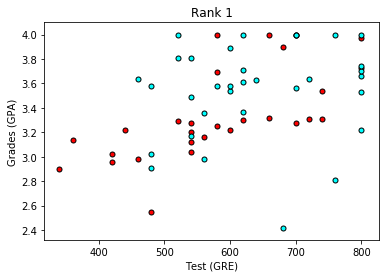

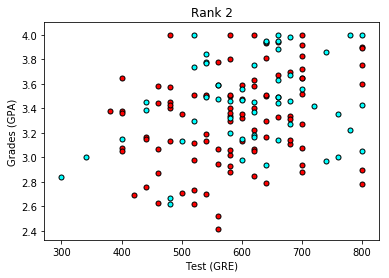

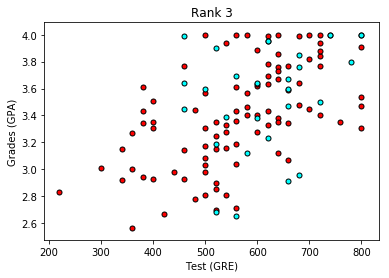

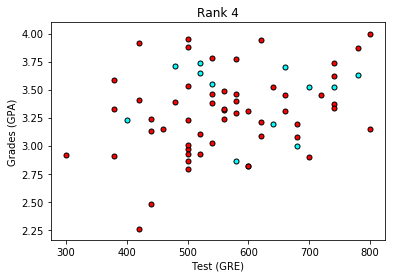

In [4]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

## TODO: One-hot encoding the rank
Use the `get_dummies` function in Pandas in order to one-hot encode the data.

In [5]:
# TODO:  Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# TODO: Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

admit  gre   gpa  rank_1  rank_2  rank_3  rank_4
0      0  380  3.61       0       0       1       0
1      1  660  3.67       0       0       1       0
2      1  800  4.00       1       0       0       0
3      1  640  3.19       0       0       0       1
4      0  520  2.93       0       0       0       1
5      1  760  3.00       0       1       0       0
6      1  560  2.98       1       0       0       0
7      0  400  3.08       0       1       0       0
8      1  540  3.39       0       0       1       0
9      0  700  3.92       0       1       0       0

## TODO: Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [6]:
# Making a copy of our data
processed_data = one_hot_data[:]

# TODO: Scale the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0

# Printing the first 10 rows of our procesed data
processed_data[:10]

admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
0      0  0.475  0.9025       0       0       1       0
1      1  0.825  0.9175       0       0       1       0
2      1  1.000  1.0000       1       0       0       0
3      1  0.800  0.7975       0       0       0       1
4      0  0.650  0.7325       0       0       0       1
5      1  0.950  0.7500       0       1       0       0
6      1  0.700  0.7450       1       0       0       0
7      0  0.500  0.7700       0       1       0       0
8      1  0.675  0.8475       0       0       1       0
9      0  0.875  0.9800       0       1       0       0

## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [7]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
158      0  0.825  0.8725       0       1       0       0
96       0  0.800  0.8800       0       0       0       1
157      1  0.600  0.8950       1       0       0       0
307      0  0.725  0.8775       0       1       0       0
142      0  0.775  0.9850       0       0       0       1
321      0  0.575  0.8950       0       1       0       0
198      0  0.750  0.9075       0       0       1       0
209      0  0.725  0.8750       0       1       0       0
323      0  0.525  0.6725       0       1       0       0
208      0  0.675  0.7900       0       0       1       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
14      1  0.875  1.0000       1       0       0       0
28      1  0.975  0.8050       0       1       0       0
34      0  0.450  0.7850       1       0       0       0
35      0  0.500  0.7625       0       1       0       0
44      0  

## Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

In [8]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank_1  rank_2  rank_3  rank_4
158  0.825  0.8725       0       1       0       0
96   0.800  0.8800       0       0       0       1
157  0.600  0.8950       1       0       0       0
307  0.725  0.8775       0       1       0       0
142  0.775  0.9850       0       0       0       1
321  0.575  0.8950       0       1       0       0
198  0.750  0.9075       0       0       1       0
209  0.725  0.8750       0       1       0       0
323  0.525  0.6725       0       1       0       0
208  0.675  0.7900       0       0       1       0
158    0
96     0
157    1
307    0
142    0
321    0
198    0
209    0
323    0
208    0
Name: admit, dtype: int64


## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [9]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# TODO: Backpropagate the error
Now it's your turn to shine. Write the error term. Remember that this is given by the equation $$ (y-\hat{y}) \sigma'(x) $$

In [10]:
# TODO: Write the error term formula
def error_term_formula(x, y, output):
    return (y - output)* sigmoid_prime(x)

In [11]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)  #MSE(mean square error)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

0.676956666102
0.504241779686
0.583113547606
0.672444106219
0.501492773298
0.665489607234
0.501317351593
0.672475187971
0.666028145573
0.499173285782
0.589469598485
0.666648571986
0.508039041895
0.671517957206
0.674456615333
0.502447934006
0.671077351295
0.501455819134
0.602283240156
0.682902812203
0.489632729619
0.599956182439
0.509557236809
0.500334840319
0.678677786984
0.591611603437
0.508882845666
0.676553038988
0.679233767567
0.673096505021
0.502128755394
0.590488566375
0.673311493927
0.60390463173
0.514551624782
0.51511558956
0.496603274634
0.49241091536
0.510224626843
0.586568963539
0.493297998846
0.581674647957
0.661874439428
0.503290276102
0.668462608243
0.672599499846
0.504176520215
0.66345168936
0.673929667225
0.581883234564
0.504625494439
0.513000534865
0.505651119291
0.494100373267
0.493471715892
0.50223988344
0.677509583263
0.594294636322
0.591716440763
0.674737732977
0.499599278154
0.678618545634
0.494915306341
0.497477274694
0.508180120183
0.676034810502
0.487449238478


0.554899919115
0.451532417694
0.626771989686
0.620391329602
0.450839194877
0.45654652269
0.634068243426
0.461743854755
0.632159142763
0.555674950533
0.445661953452
0.455281754979
0.627249814551
0.550397306878
0.449426474744
0.445488595081
0.552122605872
0.452650497324
0.452556082113
0.627820708012
0.457174597663
0.459870141751
0.626858821932
0.461603014845
0.554737028078
0.458177329004
0.451543908978
0.63706690697
0.621595662858
0.553181174413
0.623208691732
0.453156749795
0.631595248308
0.450794268916
0.622573850472
0.451729196284
0.457007435657
0.555590244997
0.450966593502
0.452632029504
0.444578002947
0.459496440637
0.629182578606
0.622414581681
0.448083812811
0.624383450655
0.457151567437
0.451798150059
0.626207031914
0.625754677929
0.46530729983
0.451376067487
0.630579080567
0.638174187262
0.448525821271
0.453399648727
0.449148488683
0.451392080431
0.617804915948
0.548978938696
0.619750334108
0.44729488545
0.449693009541
0.45599812957
0.623474794094
0.630730394844
0.451730222753


0.572912044195
0.403102531296
0.420042471131
0.403356103384
0.409598828622
0.41284888498
0.583247741971
0.414409309622
0.579834839676
0.570870574599
0.405001364647
0.576895162745
0.568930706315
0.505320874071
0.401955264729
0.575332998601
0.40580143213
0.588359750036
0.575877205454
0.575888417564
0.401546462154
0.411254024162
0.411240887226
0.577743407974
0.568284506292
0.510203147816
0.406597598096
0.403569734126
0.515489732345
0.580629840817
0.506088141452
0.574612269518
0.572724271297
0.408599886259
0.569554163109
0.410303136193
0.408836580998
0.580758130077
0.413611166865
0.506219841549
0.581043947242
0.404504663884
0.57501675084
0.412593472001
0.581084392754
0.417337700801
0.509063996667
0.568819717488
0.400382806616
0.419463664439
0.575619811662
0.578631705444
0.587772950595
0.584812948728
0.57074149606
0.41747495901
0.529595120344
0.398389471659
0.516568075445
0.400003391906
0.408338404651
0.518597114579
0.578275594916
0.582786938915
0.519769389933
0.579706472352
0.508424176694


0.365314402795
0.537096681007
0.379023284322
0.393058144655
0.531482144829
0.542583186344
0.468466701384
0.374205554173
0.536203173906
0.368430913985
0.382766102975
0.525703594747
0.538948383563
0.379652382577
0.385663513557
0.383330955157
0.369217411391
0.549618155815
0.538886985782
0.545624957915
0.386011581294
0.371596718553
0.532553313616
0.368154750398
0.485063936758
0.531687436452
0.494973616202
0.549520415192
0.37437973207
0.390054198869
0.536051557163
0.471763556112
0.373959012383
0.541928579161
0.538440504637
0.361699292416
0.369413204544
0.524141765545
0.383221774529
0.541601221137
0.547381464032
0.544586765357
0.541899913609
0.380218694757
0.379260313729
0.377073960605
0.389281995452
0.525284388882
0.387978331668
0.38718405976
0.471163936254
0.534706788642
0.542677173732
0.37609917474
0.388514181598
0.523936127874
0.483059161421
0.530554491434
0.539996591051
0.529326882544
0.365058508014
0.382606821305
0.391368652311
0.469065933283
0.550536057294
0.555433339184
0.49473462382

0.502174250347
0.335007872182
0.448281182139
0.501751031375
0.35478470606
0.45976425599
0.35082138916
0.353748900492
0.496225177235
0.456175968659
0.330510597899
0.48868257369
0.51024948321
0.508726106194
0.347844796993
0.457546854149
0.500899533625
0.46008151846
0.340523336263
0.344095686669
0.355953932916
0.346495031834
0.34641397457
0.467230984597
0.369774518506
0.460500819342
0.505785318237
0.346592588112
0.510035432117
0.504759900646
0.36873337965
0.518174278033
0.496295289824
0.471499871278
0.337854760894
0.33079328174
0.35300497306
0.347503441058
0.362050006881
0.366085542723
0.496366665716
0.447159089353
0.466420648505
0.512302026356
0.366578524865
0.505292036784
0.362606650034
0.33560734096
0.334598489351
0.513151715999
0.349483887387
0.470794746007
0.355595746344
0.339677438972
0.34438287198
0.355287677816
0.502174250347
0.364376217225
0.496225177235
0.512972757268
0.44407926038
0.509079103242
0.351917253437
0.346912526355
0.361933773602
0.344542341739
0.513114157223
0.466314

0.3254216142
0.430537810829
0.325109862547
0.486352340379
0.489682363853
0.333513181316
0.330053839691
0.494062997922
0.340786627882
0.474764428624
0.476089325523
0.332967429191
0.331819435631
0.490487113651
0.450672805737
0.334501266573
0.327282919979
0.466291909333
0.313501461405
0.334878070574
0.494896224749
0.349228280236
0.338618445968
0.508521618173
0.352848531783
0.438172665217
0.354246756558
0.327547144663
0.489217130715
0.512356979764
0.439329362804
0.497872887672
0.317073851112
0.495005166995
0.313807257467
0.501504782739
0.335701861638
0.323936284139
0.432413367656
0.350673886743
0.330199008993
0.320275996753
0.342617241186
0.46605714662
0.484606467335
0.329193586746
0.490337187317
0.344205953196
0.350694667345
0.460123310334
0.486120478474
0.3471578101
0.312831945391
0.470136435615
0.492492813138
0.329861135595
0.337372379252
0.316979488456
0.336900471657
0.47125311141
0.438684025967
0.468681750676
0.317287109089
0.349965454527
0.338463667748
0.471279919691
0.508903521379
0

0.463156950166
0.440357518596
0.430809605396
0.324415071076
0.304696975081
0.431312149831
0.477750721137
0.4272661074
0.458611023705
0.448576839913
0.3266048081
0.442702763145
0.322521961197
0.317806740571
0.476679711202
0.335004028951
0.426215908588
0.475905437563
0.306210313418
0.463288104328
0.324002631915
0.470735627902
0.333102072241
0.414645578524
0.443941454892
0.290805847904
0.327324567395
0.463107510838
0.462204689496
0.487299519743
0.468580893166
0.455316489551
0.32633631791
0.459562718067
0.306336173659
0.444919777497
0.293469095913
0.315848220166
0.452516882647
0.466771679137
0.472628501468
0.449442655289
0.462910792051
0.427605730478
0.309362224473
0.414934166923
0.308798133252
0.465703334098
0.470406067589
0.317684524605
0.313683033887
0.473386081163
0.324451604833
0.451797741896
0.466393474648
0.31769859188
0.315791232885
0.470324198187
0.43829111548
0.319469950714
0.311922026376
0.455758790623
0.295843849963
0.319513181499
0.475246638378
0.334401377262
0.322269395246
0.

0.42000671987
0.440841097279
0.419022556641
0.290403691236
0.294591526801
0.314078938169
0.303507789445
0.296952853953
0.433831251965
0.332245167172
0.426625498312
0.451214811951
0.300746011305
0.454474799859
0.446122679714
0.326081095002
0.466917628572
0.434640242691
0.440889445871
0.289736043126
0.279070715698
0.307997839702
0.302536932326
0.322520089127
0.325146348064
0.433472446407
0.405391604854
0.431137258113
0.455228243617
0.326490774856
0.44468623521
0.322818763876
0.288851260675
0.284877951958
0.455880896674
0.308524789986
0.437899253092
0.315857459306
0.288355232206
0.296349815744
0.306342006946
0.443286536946
0.326078490812
0.432876330353
0.460312641734
0.401154968052
0.454110772027
0.30814903993
0.303283500616
0.317546316299
0.297606408491
0.460915833522
0.431422521485
0.4354102418
0.424400842806
0.450237639961
0.316536451598
0.344500825123
0.45243192539
0.332392928287
0.335633312693
0.301033481663
0.311232153977
0.428174995724
0.306005936329
0.45865540257
0.323483369017
0.

0.295226779251
0.443369340202
0.423653315208
0.30010062648
0.292176888888
0.443492007176
0.273413661869
0.299739019799
0.448929102942
0.314709322666
0.300775956282
0.467090469466
0.318035755533
0.40611369603
0.320727376765
0.290921996214
0.438461636744
0.473881682964
0.408084359402
0.454343516801
0.277642328571
0.447818845268
0.274252365398
0.45930735593
0.299317453319
0.285062596611
0.398424238125
0.319939273717
0.293916236986
0.283759557328
0.305837079002
0.41114560931
0.437309625621
0.292221407221
0.444119169665
0.308443245612
0.318015000943
0.404506419079
0.438180928588
0.309926547349
0.272918168942
0.415931446725
0.442352271203
0.294575223868
0.30094701904
0.278543504883
0.302564804618
0.421516489863
0.408533176296
0.417572957901
0.279391893454
0.319396528918
0.303283713344
0.419715289809
0.466300660609
0.288457771407
0.406376525113
0.300958764882
0.438661880229
0.42832390484
0.388690996052
0.304560584813
0.315394105278
0.301472299761
0.428146915285
0.290949957509
0.405838730073
0

0.422237454395
0.299911842904
0.429155054647
0.437886125022
0.403299724431
0.299192454248
0.41657307715
0.338249696107
0.413138097695
0.414200060667
0.275648634644
0.449962959697
0.298485533164
0.273135882126
0.289969524737
0.310050570067
0.403869992537
0.302440987571
0.316172835404
0.425991448341
0.278557242863
0.415660454363
0.286358148124
0.416568914304
0.4207140521
0.275904478104
0.426982461505
0.279087792334
0.421048377592
0.460000701883
0.295902240814
0.424878214918
0.425880142571
0.265309333382
0.451349686924
0.415517684943
0.294718497937
0.419472912689
0.269184865107
0.389981468
0.413187724726
0.299055423634
0.40702915792
0.283523509862
0.293824422668
0.407498330162
0.405611139021
0.26097804097
0.398024614512
0.426934496245
0.427749706556
0.285479169258
0.408022718581
0.416612645526
0.405752852983
0.271736602753
0.276101384078
0.298070542417
0.28716087902
0.277630261004
0.423394571455
0.317690352533
0.415997547564
0.42894926055
0.283445077711
0.431831516058
0.42238640083
0.3088

0.263947435653
0.289280026864
0.401322665595
0.399294574427
0.396902015903
0.264973152975
0.307384681541
0.289708326703
0.398872906269
0.448601724809
0.274262420116
0.384155478993
0.287770139
0.418619974832
0.407733723732
0.377496753637
0.290715321863
0.301515505858
0.286583227173
0.419425476052
0.276996109961
0.396905745231
0.279386504552
0.273281542339
0.446998400987
0.430107385996
0.386657197116
0.413341795316
0.293146960095
0.420375258324
0.429466753202
0.393964192461
0.293295617199
0.413170016043
0.332602412232
0.404278756872
0.405246627815
0.268466816104
0.448006587142
0.29264398603
0.266786495996
0.283859719366
0.303578606525
0.394507377771
0.296767007076
0.311022214776
0.417218793852
0.272024904796
0.406863285957
0.27972072624
0.41368019901
0.412170260214
0.26917286584
0.418796586336
0.273077295349
0.412511619377
0.45265333737
0.290227086573
0.422048533228
0.41763298813
0.258950562271
0.443604456414
0.406791745242
0.28825346307
0.410940288368
0.263018986693
0.385863305924
0.404

0.258150118076
0.383183511577
0.396874564864
0.28934335385
0.401148611855
0.271195383623
0.283528450354
0.391182034868
0.400057324426
0.249479811426
0.381457632821
0.411379459841
0.412552022729
0.274863144247
0.402639237773
0.400938153096
0.399622870453
0.26028752012
0.264741595909
0.288054108251
0.276963888931
0.265135867905
0.418958247912
0.308481492139
0.411423842626
0.414385947621
0.272726510523
0.417052209117
0.406987666562
0.297468252807
0.431933584675
0.393888329186
0.427696165075
0.260651090557
0.248291757326
0.280357423615
0.272962626499
0.297707982739
0.299563424421
0.392029335281
0.3855106074
0.415150207973
0.416924211348
0.301360628111
0.404433831756
0.297866375052
0.260475485293
0.255032536963
0.417458005024
0.283020198587
0.423349401746
0.290964321142
0.255734890326
0.267238190517
0.274649952921
0.404031915393
0.301917786451
0.391182034868
0.424540093895
0.380592411661
0.417033492599
0.279133073223
0.276403749202
0.288098012825
0.269049719921
0.425409160979
0.415664650708

0.400304749646
0.270546537669
0.298861356183
0.396329718631
0.405183159651
0.371336387064
0.268870640734
0.403154759769
0.254352132456
0.284238031536
0.380308572927
0.405597174319
0.276766990747
0.287659542597
0.280494409528
0.261539559777
0.437054181911
0.402224846523
0.416915466419
0.292742982741
0.263219394838
0.388401500138
0.259140192174
0.404145591851
0.389116114035
0.434136440097
0.420261818619
0.271704360115
0.294289933711
0.398552536232
0.388480477031
0.27287919739
0.406260491872
0.403651254453
0.251655877095
0.261821806937
0.369274842018
0.287694607924
0.406799497153
0.421015556986
0.42285974533
0.408397183239
0.285025230851
0.282565975721
0.265941758861
0.291247417085
0.379620232689
0.297623670309
0.303058694817
0.385341371227
0.395220288137
0.414097934485
0.277851708092
0.294771917114
0.376347227106
0.409516191678
0.393701118785
0.415036239054
0.389504117204
0.253001629512
0.296009174854
0.29534404597
0.374430903422
0.431965809679
0.439318100671
0.43595274451
0.288685221453

0.415698955097
0.265162216391
0.392864153794
0.267396721655
0.261047266364
0.430874811108
0.412941666788
0.381676368433
0.395524225988
0.279247725747
0.402759233961
0.412472637589
0.37539945622
0.281877612049
0.409595831373
0.320517244934
0.386518264859
0.387327460893
0.253953056502
0.447126021803
0.281318003883
0.254621900368
0.27208568362
0.290144499541
0.375896952982
0.285722630835
0.300866772173
0.399612320643
0.259554479417
0.389279744254
0.266113888033
0.411026983324
0.395016598486
0.255443961072
0.402252762526
0.261516159689
0.395370067721
0.437588049662
0.279221191975
0.419546611102
0.400984478336
0.246826046221
0.427843853181
0.389327992056
0.274908225972
0.393804545248
0.251207465364
0.380938001049
0.38617519958
0.283100831976
0.399481852888
0.262870366145
0.276974126342
0.380479123981
0.398563945049
0.242299254391
0.370619289881
0.401095973744
0.402461977532
0.268138139463
0.401250019637
0.390583447531
0.397813529078
0.253126849402
0.257626247959
0.28164949215
0.270460432208

0.395721225886
0.256966872229
0.38541506807
0.262982328822
0.4114663017
0.391223707259
0.252303230676
0.39856199133
0.259092126248
0.391579320965
0.434166032147
0.276888875208
0.420030843004
0.397276097786
0.244313257315
0.424299964369
0.385482443219
0.271810897699
0.39001380372
0.248743487847
0.380934299282
0.382245787002
0.280841738946
0.399684083381
0.259702463208
0.274624353348
0.376546478134
0.39881454519
0.239768260016
0.366644858089
0.397293034576
0.398715317998
0.265737750085
0.401536251528
0.386754658389
0.397971064538
0.250601231665
0.255113713137
0.279343744494
0.268123473707
0.253552434219
0.418646072448
0.300349437928
0.410958557129
0.400992822834
0.263531190539
0.403514016493
0.393002923753
0.286528800708
0.419047186066
0.379488269203
0.42789541843
0.251209222657
0.238468367148
0.271252729111
0.261874692
0.289302524756
0.29097160038
0.37745646739
0.38360348194
0.414516693719
0.403163255994
0.292881908718
0.390165975215
0.289426773317
0.251202570242
0.245417428186
0.403667

0.264987643951
0.266581056651
0.247065011285
0.27355856106
0.376091254969
0.395791484747
0.371229337701
0.248246072344
0.292845773906
0.273725837977
0.37304394847
0.425831915195
0.257723955028
0.357071510908
0.272133961634
0.393556585178
0.382144705111
0.371821576289
0.274491061166
0.282752551331
0.266989505605
0.416705415524
0.260671664075
0.393655999778
0.262866261361
0.256450205736
0.424220365338
0.405969317298
0.382147452433
0.388348849583
0.273309764578
0.395648590838
0.405545480155
0.368002420234
0.277507571575
0.410609998391
0.315028387041
0.379346527383
0.380114356445
0.247903175887
0.449074126336
0.276971761113
0.250041716259
0.267614501535
0.28431506522
0.36848818998
0.281454882333
0.296852652855
0.392499349141
0.254895191285
0.38222496757
0.260318356646
0.412332628393
0.388082363711
0.249639317068
0.395489986234
0.257139538923
0.388439528287
0.431290734913
0.274998955884
0.420940135426
0.394192092655
0.242302556342
0.421338774279
0.382304635381
0.269164756772
0.386873249126


0.274044974876
0.27418216901
0.254393643197
0.280108599628
0.365369498556
0.289544341957
0.295278484252
0.38636377745
0.381274081316
0.400735454803
0.269397706567
0.283810518564
0.362005752718
0.411530028523
0.379885784325
0.40186155944
0.375538750826
0.24398632418
0.288099106765
0.28427701087
0.374844386771
0.419182680522
0.426697474688
0.439116978958
0.280425657531
0.239317884776
0.423565575428
0.428088566604
0.25604762287
0.406378877756
0.383686099852
0.427258715949
0.250697534369
0.370907980645
0.249456590743
0.284467778896
0.246851683808
0.25189161351
0.264178240764
0.410066110968
0.281952569675
0.384536626037
0.37788738925
0.25447423544
0.381765911767
0.35079742883
0.391973978587
0.244332315009
0.38990103511
0.234559488444
0.428036133835
0.385288602039
0.375637030579
0.246638510264
0.26610897262
0.267564179827
0.38757397452
0.358787395529
0.404872419836
0.276697858116
0.250306194638
0.402928780976
0.407962803856
0.401549907635
0.382429878883
0.368577020595
0.278934857592
0.361572

0.248120329215
0.282429543279
0.245510930015
0.249857742611
0.262139872431
0.40786952088
0.280665280713
0.382262822743
0.375610621108
0.253143641097
0.379489328749
0.348457005897
0.393258142368
0.242989784913
0.387651800918
0.232539510744
0.425897340124
0.383024282951
0.373344903331
0.245300059239
0.264791094279
0.265529233705
0.385313150238
0.356465907053
0.406229534804
0.275410309017
0.248970634119
0.404264022498
0.405763670129
0.402893552325
0.380159393255
0.366271726874
0.277649436603
0.359255731259
0.271078721266
0.265049516647
0.404072516114
0.279898821247
0.401206284066
0.402748620394
0.250677079062
0.386931577837
0.264863966779
0.394926115321
0.283045976596
0.38200230765
0.361441806117
0.23125625414
0.266529784243
0.386346826207
0.383428012757
0.416463906968
0.389725830414
0.377258064973
0.266010825478
0.440624014609
0.25343024027
0.424746632154
0.235020555207
0.262507721789
0.435486842088
0.39044741299
0.396877004947
0.430085436279
0.383921503332
0.402209418571
0.255409575829


0.388548303884
0.394988464002
0.431764554557
0.382013551192
0.403765693991
0.254326449917
0.383826035512
0.253101575596
0.386876839567
0.39557788716
0.256222126667
0.257771414266
0.394443699858
0.261481234746
0.366417365856
0.454867933466
0.257711138486
0.260768218428
0.392897803606
0.417629262403
0.267089250129
0.258717520035
0.441313361587
0.236843910551
0.266233780445
0.399316652069
0.27522883368
0.259318459787
0.420951729448
0.278315181814
0.39573019312
0.281844946691
0.256462006381
0.385345234427
0.430021982121
0.398372411255
0.40654953573
0.241449426199
0.397310596042
0.238015179112
0.41253199276
0.258842278802
0.249165463912
0.386349792296
0.289439533534
0.259668729532
0.249412881836
0.26498723166
0.355181559329
0.386695397954
0.251499528682
0.394305339871
0.26822418959
0.279730115038
0.348108705527
0.387102368564
0.268711372532
0.236465547717
0.360429352344
0.389681729423
0.260987335263
0.260415561578
0.24298580222
0.269592980242
0.369158062876
0.399649423651
0.364252692136
0.2

0.365054958049
0.246148247799
0.278978496798
0.24354063594
0.246500458679
0.258740007842
0.404394777073
0.278713559385
0.378736918449
0.372059677532
0.251172501921
0.37595429191
0.34488760643
0.396463098009
0.241018926046
0.384124624761
0.229256551401
0.422477216615
0.379491710378
0.369801280906
0.243327108494
0.262828637067
0.262114925375
0.381787297192
0.352896809816
0.409542154115
0.273442978889
0.24699887235
0.407572254487
0.402279243924
0.40617330515
0.376620760877
0.362716126004
0.275686428626
0.355690101221
0.269115948267
0.263083198426
0.400584849619
0.276443939527
0.404473608055
0.399258849222
0.248706038587
0.383402735316
0.261454112772
0.391421838982
0.281100658834
0.385126061849
0.357875855439
0.229293441524
0.263125241228
0.382818312713
0.37990130843
0.413018058432
0.386220294896
0.373708639549
0.262604852148
0.444215717702
0.251448623908
0.428205037719
0.233053281743
0.260540468712
0.439022660449
0.386930228818
0.393379524341
0.433587020139
0.380397546601
0.405488556996
0

0.382786975103
0.238689365096
0.248945109158
0.347323545454
0.269727170493
0.385961258889
0.400718131305
0.402804645581
0.387634087121
0.267093020454
0.270177876446
0.247579244884
0.273150387974
0.35811029814
0.285583924599
0.291323600016
0.392575992639
0.37407486511
0.393621494492
0.265381531689
0.276827984053
0.354738947352
0.418164826137
0.372667294058
0.394740559241
0.368307769953
0.239955208313
0.284117310321
0.277302031121
0.380867714858
0.412175707395
0.419747839734
0.446175363362
0.276436933476
0.235291358287
0.416603783386
0.434992333206
0.249227393315
0.399309436223
0.376502971592
0.420324378012
0.246665248913
0.363672746803
0.245421010337
0.277489896761
0.2428181748
0.245088799297
0.257295219024
0.40300619324
0.277968596078
0.377360066195
0.370663200956
0.250442019672
0.374571514897
0.343520943698
0.398282582048
0.240297233297
0.382728830205
0.227898348381
0.421093841614
0.378102179651
0.368422296577
0.242600674534
0.262096534668
0.260655293516
0.380401069861
0.351516822278


0.387395912862
0.255618251545
0.389935500726
0.379279544124
0.2736751371
0.405708145225
0.365611365505
0.438877441714
0.24323846095
0.230451835059
0.263382070415
0.249163726635
0.281594069605
0.283262764169
0.363550960154
0.393084332806
0.42504625294
0.389565102798
0.285195670892
0.376394644671
0.28171687329
0.243243358181
0.237422930795
0.390073567976
0.266615444802
0.433976577074
0.27477410482
0.231439907221
0.249831800448
0.250295970985
0.37625843231
0.28601420785
0.362629371874
0.397981833135
0.387764393674
0.390010861421
0.255401394949
0.259605614387
0.264165162619
0.251790654263
0.398937031455
0.425646185405
0.430971017419
0.416164582533
0.450444647909
0.274279973959
0.295745765158
0.386075092817
0.281662348704
0.286525365779
0.255733759637
0.257732041994
0.357763815718
0.262201040155
0.393797046208
0.28140185529
0.427970534627
0.233017260842
0.400393328254
0.380927348478
0.243694360951
0.27838056047
0.387764393674
0.300673571279
0.406381722206
0.228017765375
0.24880831192
0.2380

0.274173092299
0.352533597833
0.422129947169
0.370404308752
0.392431905012
0.366062358869
0.238885913808
0.282890035489
0.274670765248
0.384725790231
0.409875519729
0.417457747939
0.450207224019
0.275266648641
0.23424482416
0.414343687287
0.43902915198
0.246785407192
0.397069413049
0.374290490741
0.418065701635
0.24557086263
0.36146756215
0.244322059301
0.274851496836
0.241733931534
0.242642849783
0.25476787696
0.40072787722
0.276797245004
0.375154734369
0.368408863145
0.249331690463
0.37235242025
0.341377576283
0.402174621311
0.239215883187
0.380461169034
0.225579950685
0.418796486207
0.37585895667
0.366221444373
0.241504934319
0.260975164761
0.258088303561
0.378164446031
0.349329075345
0.415350197744
0.271479119127
0.24517151996
0.413437778821
0.398590352553
0.411923279213
0.372988541057
0.35914012936
0.273729262168
0.352119665664
0.267215091512
0.261204568667
0.396905319228
0.272279942839
0.410220327438
0.395588929308
0.246876414913
0.379739293577
0.257448173162
0.387789913378
0.279

0.273244738298
0.351242144095
0.266758427128
0.260759758425
0.395955387737
0.271074359043
0.412242981858
0.394644272904
0.246456944456
0.378807186238
0.256309427659
0.386867580191
0.278739718811
0.392885312245
0.353395684548
0.22717907143
0.258049963495
0.378237878004
0.375396395481
0.408423527593
0.381771378121
0.369120864036
0.257510022334
0.452440976918
0.249088357303
0.43619370876
0.230896400374
0.258233434937
0.447052898481
0.382362502726
0.38883985647
0.441635943761
0.375907041435
0.413298471658
0.251130111733
0.393250900483
0.249933556138
0.380706633937
0.389281724061
0.249528106776
0.254634479762
0.388360371812
0.254835727939
0.360410932456
0.464917600485
0.250935802759
0.257600350787
0.386714643349
0.427328761424
0.263818887174
0.255447481922
0.451223485208
0.233787945136
0.263004877642
0.393122881623
0.268341342523
0.252682292387
0.414694007829
0.271440199721
0.405283292714
0.274883432207
0.253274802306
0.379337411213
0.423668549324
0.407930087551
0.400265458563
0.23836982628

0.248545897579
0.370659370077
0.339798083874
0.406241498335
0.238469116749
0.378699590905
0.223641357859
0.416956973964
0.374132364607
0.364555994504
0.240739420778
0.260171502942
0.255862600291
0.37644450734
0.347689663862
0.419453678885
0.270562948887
0.244400033805
0.417604950586
0.396778488921
0.415985213361
0.371265809674
0.357485073452
0.27281767482
0.350475656925
0.266362166284
0.260376783449
0.395105051162
0.269935145817
0.414286403842
0.393799880418
0.246102196303
0.377978645562
0.255241412517
0.386048618938
0.278338213914
0.394961577337
0.352617515584
0.226871546197
0.257006106981
0.37741480028
0.374600573228
0.407576381276
0.380991316717
0.368299769495
0.256459342369
0.454571795772
0.248695295546
0.43827028297
0.230574376886
0.257856675867
0.449125388296
0.381541528237
0.388024701238
0.44372400297
0.375115880979
0.415353983244
0.2507553187
0.395327884404
0.249567847995
0.379891882388
0.38842039111
0.248474078272
0.254277014562
0.38756590608
0.253800034911
0.359661375043
0.46

0.377236081709
0.254232420206
0.385315505639
0.277984228534
0.397054079984
0.351930162977
0.226618950796
0.256022834404
0.376678089745
0.373893058786
0.406810926467
0.380300015556
0.367565874717
0.255468801543
0.456702080518
0.248351616668
0.440347946748
0.230306392377
0.25753002869
0.451195196277
0.380806693964
0.387295441064
0.445812140799
0.374413279627
0.41741695571
0.250430993783
0.397421019017
0.249253208091
0.379163808043
0.387642010906
0.247479312546
0.253970994718
0.386858682408
0.252825149314
0.35900405293
0.469085539356
0.248837910542
0.256914971316
0.385152299032
0.431473786158
0.263062877897
0.254698503492
0.455372727128
0.233184951979
0.262276065816
0.391540812158
0.266193441849
0.250674600923
0.413020410218
0.269302873631
0.409463110693
0.272694091426
0.25258015672
0.377900874086
0.421909459537
0.41209689528
0.39861000642
0.237750789729
0.389643504372
0.234310507971
0.40453940446
0.250056853814
0.245458168059
0.399992801879
0.285239476408
0.25577580392
0.245473351501
0.2

0.37325907977
0.406114003033
0.379682614069
0.36690464794
0.254528732201
0.458822033646
0.2480476025
0.442416770933
0.230081609811
0.257243617054
0.453253081636
0.380143753987
0.386637902274
0.447890575081
0.373784407651
0.419476401013
0.250147167882
0.399517762283
0.248979525451
0.37850803501
0.386933100105
0.24653430953
0.253706228131
0.386224211041
0.251901218154
0.358423223588
0.471150279072
0.247866778142
0.25663829359
0.384485353948
0.433541405324
0.262747869095
0.254387677995
0.457432691214
0.232953181285
0.26197574254
0.390862468844
0.265197167105
0.249751979224
0.412289639659
0.268312489085
0.411559447187
0.271676054053
0.252298663964
0.377302480184
0.421131101716
0.414184961446
0.397891191958
0.237510354448
0.388989580696
0.23406908941
0.403804008252
0.249104592217
0.245214837657
0.402093385429
0.284877877989
0.25549112904
0.245181312933
0.255266284697
0.347229147603
0.378197710389
0.241878412848
0.385792960895
0.258367083689
0.269460724223
0.340156726842
0.378700766657
0.259

0.446700614613
0.272189858008
0.225718085536
0.247816805283
0.24428919935
0.371372738228
0.283397737351
0.358029228626
0.392745136377
0.400329057031
0.384903907918
0.248913277784
0.257260881782
0.257714925556
0.249690514908
0.393664356735
0.438377573573
0.443674691889
0.42895149033
0.463063306429
0.27185782868
0.288592993716
0.381239087844
0.274791624667
0.279422080729
0.25358818468
0.251331967831
0.353127762081
0.259893857886
0.388865142991
0.279025106033
0.440652942241
0.231089002545
0.39543556819
0.376334621809
0.237719983299
0.275964576242
0.400329057031
0.297929242222
0.419046847341
0.226210510998
0.242751005839
0.23220603629
0.360507963628
0.244023523597
0.246437273388
0.373324142679
0.244744849148
0.272660577638
0.369241531424
0.378330586708
0.392057655477
0.243077177006
0.376217447645
0.238777992837
0.258187061642
0.352958408758
0.378725018415
0.261341297075
0.261569646136
0.254514863653
0.245979498946
0.410980813122
0.375291036067
0.390321844184
0.277497098133
0.247678619355
0

0.439847139424
0.384139132109
0.282479490477
0.371190610348
0.278924827626
0.240853473747
0.235302597463
0.384682722183
0.263795164875
0.448726530651
0.271898902902
0.224972832659
0.247635691188
0.243496890034
0.370831687386
0.283098842462
0.357544235275
0.392132828033
0.402369856885
0.384318137886
0.248032565795
0.257016883322
0.256843193247
0.249493230412
0.393045002225
0.44041257398
0.445699483168
0.431006080547
0.465054684743
0.271597475091
0.287594085934
0.380705313089
0.273844204043
0.278431774492
0.253382048025
0.25046820641
0.35263663187
0.25965667356
0.388311398196
0.278772184014
0.442676458291
0.230924685479
0.394875152353
0.375847830841
0.236931807717
0.275704757663
0.402369856885
0.297603228227
0.421087818749
0.226068923629
0.241948864908
0.231442430126
0.360008501559
0.243803973643
0.246210300703
0.372798791843
0.243918448609
0.271718833707
0.368691001535
0.377823810188
0.394118598929
0.242227416721
0.375665110595
0.238624435926
0.257279999702
0.352461663179
0.37818192194


0.245896962484
0.340973995968
0.259755831492
0.37895946654
0.393436926327
0.395224751235
0.380574467397
0.257107032904
0.266699431493
0.238657230485
0.263332549803
0.351310643735
0.281910811459
0.287322573795
0.411011854758
0.367153717405
0.386335052263
0.261940233047
0.266732731722
0.348012262955
0.436754638037
0.365524297578
0.387209901059
0.361290296285
0.23708637116
0.28017246534
0.267352792827
0.399444709551
0.404591931355
0.412174776358
0.464731327462
0.272871581715
0.232565927911
0.409239244762
0.453755635231
0.240338807086
0.392179379887
0.369657871416
0.412942536043
0.243634798319
0.356920853432
0.242363563978
0.267497316863
0.239854446854
0.236154942721
0.247919679669
0.395616392803
0.274391766846
0.370555731467
0.363581610018
0.247307881496
0.367693328887
0.337203054613
0.416756923767
0.237353343529
0.375513601906
0.219640436792
0.413465987217
0.371059413561
0.361680950008
0.239565770828
0.258872975
0.251049975436
0.373389162874
0.344907316311
0.430006663446
0.268911807004
0

0.43318370443
0.360541339542
0.46478297931
0.392270574206
0.255616395614
0.265427332455
0.370086240225
0.416298968784
0.256761289711
0.377985257119
0.375255906367
0.235536150778
0.245740732855
0.340617681962
0.258880994649
0.378511990483
0.392948800413
0.394697129728
0.380119037503
0.256229731733
0.266485075205
0.23791028722
0.262478075625
0.350894834732
0.281668380941
0.287036306227
0.412985516903
0.366719484098
0.385848468301
0.261731375904
0.265843439091
0.347606323629
0.438717327402
0.365061548602
0.386691267155
0.360844661562
0.236953786174
0.279895081052
0.266482278612
0.401452177026
0.40406043036
0.411641663638
0.466658343099
0.272644918362
0.232452013894
0.408734509081
0.455721934976
0.239596726351
0.391711349207
0.369233002056
0.412434039378
0.243480990513
0.35651046271
0.242206306219
0.266621285662
0.239709461415
0.235405573098
0.247117881737
0.395113394628
0.274163338726
0.370135969499
0.363127220693
0.247140387706
0.367264571689
0.336851082616
0.418728476375
0.23721099904
0

0.458242418707
0.371332695093
0.429797103955
0.24907864653
0.410104845476
0.2479672053
0.375905724425
0.384033069
0.242206321068
0.252742650583
0.383736210552
0.247692350328
0.356241474663
0.481370670922
0.243396901969
0.25560839448
0.381818587641
0.443869735086
0.261504856911
0.253169365151
0.467658309178
0.232172973923
0.260814079202
0.388129404745
0.260600286265
0.245548765725
0.409252593195
0.263749371017
0.422108892798
0.266963041116
0.251242784344
0.375017996683
0.417823645325
0.42468061518
0.394930203169
0.236682385747
0.386392581309
0.233235577858
0.400747467367
0.244738773256
0.244370676029
0.412694300856
0.283370281521
0.254417197073
0.244067831249
0.250935539391
0.345110907505
0.37547262346
0.237595544321
0.383024888659
0.253917330431
0.264649302947
0.338049859109
0.376066230691
0.254747454183
0.231750529425
0.350308113331
0.379324372943
0.255517393151
0.246309966808
0.238007288687
0.264035790364
0.358089710555
0.425722783476
0.353417829167
0.239088280319
0.282889003079
0.26

0.40781377462
0.459549463575
0.238180277098
0.390865122731
0.368474016627
0.411505582834
0.243211273907
0.355780557268
0.241929615396
0.264937881566
0.239457502578
0.233974105822
0.245582191133
0.394196549301
0.27374305103
0.369387290887
0.362308648662
0.246843089874
0.36649773393
0.336238495191
0.422576699204
0.23696433435
0.374180387205
0.217695672419
0.411931547203
0.369797053224
0.360542480062
0.239140937516
0.258369952615
0.248627198543
0.372137300378
0.343827054943
0.435826458114
0.268189146823
0.24277052329
0.434320803483
0.39196072813
0.432185753505
0.366955510264
0.353533818311
0.270463135077
0.346587555456
0.264308362829
0.258455150594
0.390350026729
0.262147596059
0.430526794466
0.38910451929
0.244458287942
0.373465711814
0.248096907729
0.381612201096
0.276220169778
0.411700671221
0.348616490694
0.225678885964
0.250091995583
0.372954910695
0.37040517465
0.402820808288
0.376935520636
0.363872703319
0.249480045368
0.471318366883
0.246685123883
0.454624708763
0.229244234994
0.2

0.281009515266
0.286244519486
0.418716166454
0.365590359301
0.384560759535
0.261174507291
0.263308363499
0.346562204235
0.444400432241
0.363846019565
0.385306453806
0.359680864931
0.23662764827
0.279130415675
0.264003795569
0.407292942828
0.402636006169
0.410211918616
0.472219605168
0.272034009078
0.23218230725
0.407390932951
0.461407650597
0.237501030616
0.390479718954
0.368132284599
0.411078840406
0.243090717052
0.355453272773
0.241805550055
0.264126210213
0.239345826812
0.233287196942
0.244843688054
0.393775713441
0.273547057434
0.369050737115
0.361936968328
0.246708719382
0.366152045156
0.33596971737
0.424449392511
0.236855293762
0.373788604991
0.217086408058
0.411472091102
0.369429003182
0.360215879077
0.239019902534
0.258222818456
0.247860421129
0.371772788687
0.343519668807
0.437696966052
0.267968371776
0.242645543034
0.436236833517
0.391529688827
0.434035708885
0.366590738077
0.35321521193
0.270244751186
0.346276961546
0.264128736071
0.258292606102
0.38992715047
0.261312619864


0.37539788407
0.233550045682
0.402640088283
0.364096794699
0.247357154693
0.368415644274
0.237670578896
0.416381959716
0.361344662853
0.268902675509
0.435843152106
0.23606670514
0.263183691069
0.355456054875
0.434496883615
0.229103611011
0.345530261309
0.376108585254
0.37718477529
0.254467505206
0.437271621055
0.365298317555
0.434267820388
0.239995638702
0.24447337235
0.267703492611
0.256442015469
0.230232998776
0.454827287444
0.28838723984
0.446600190526
0.378837895104
0.252332610946
0.381710100375
0.371471439095
0.261526713364
0.39693559309
0.358117051253
0.464144124653
0.240220671932
0.227973567901
0.260060194951
0.237558581772
0.277438119691
0.27945754235
0.356295296463
0.418757969717
0.450820963436
0.381707805184
0.281242454659
0.368980740612
0.277621154378
0.239944280232
0.234643513039
0.382283245822
0.26247810643
0.459594318248
0.270524741912
0.221226372114
0.246904829882
0.239491770444
0.368415644274
0.281676505065
0.355456054875
0.389297017276
0.413423309831
0.381639054062
0.2

0.369352511114
0.228067454967
0.376228432224
0.247742800916
0.369707455987
0.411773799924
0.265213320297
0.458216518047
0.375019375789
0.233465127168
0.402243670204
0.363774791537
0.246643323802
0.368070129559
0.237557318826
0.418255393896
0.361068873549
0.268697423104
0.437703884829
0.235412502086
0.263026911603
0.355168392669
0.436317976814
0.229027892863
0.345247793275
0.375791817781
0.376835511252
0.254330794136
0.439086631437
0.364968765835
0.436147903965
0.239923621298
0.244397018411
0.267525863948
0.256267515448
0.229599209777
0.456616156435
0.288163326402
0.448369771846
0.378430303957
0.252203307351
0.381330593303
0.371128641624
0.26077521063
0.396507091397
0.357801888895
0.46590467257
0.240114367717
0.227913051073
0.259927508157
0.236847353979
0.277232962759
0.279282143747
0.356000576754
0.420593577592
0.452636636694
0.381359764926
0.281054234065
0.368671824924
0.27742112185
0.239813955509
0.23455748615
0.381940864116
0.262275681891
0.461389068152
0.270312213014
0.220626181107

0.225871379411
0.487793599693
0.266676082722
0.240337515134
0.257700472697
0.260160885096
0.349421530557
0.270897576546
0.285556864124
0.372990486936
0.245671842842
0.363564500499
0.237647097309
0.450716855125
0.369029356799
0.227423974431
0.375860060938
0.247618710509
0.369383901056
0.411353036841
0.265054311819
0.459979784706
0.374658644729
0.233385284027
0.401865285465
0.363470291388
0.245944600689
0.367742230202
0.237449235142
0.420092291439
0.360810432434
0.26849777924
0.439526969613
0.234772850943
0.262875577846
0.35489803397
0.438101499198
0.228957193948
0.34498247562
0.375492670275
0.376503963024
0.254199428094
0.440863927213
0.364656751367
0.437990422705
0.239856695091
0.24432579649
0.267353760019
0.256098474712
0.228979735055
0.458366473331
0.287945148073
0.450101194378
0.378040602126
0.252079316876
0.380968924533
0.370803485065
0.260039264197
0.396096673433
0.357504138016
0.467626289769
0.240013239841
0.22785750889
0.259800186992
0.2361510416
0.277033449429
0.27911231404
0.3

0.242273202551
0.39240011025
0.272883342655
0.367981431634
0.360738712537
0.246269057325
0.365049114441
0.335144333843
0.431003081688
0.236507648396
0.372517929963
0.214979257454
0.409955943179
0.368244669842
0.359182120875
0.238628553561
0.257737048225
0.245187902599
0.370601571686
0.342554238206
0.444235951914
0.267214008751
0.242239978728
0.442943812719
0.390116706174
0.44050095239
0.365418136088
0.352209929627
0.26949918496
0.345300151054
0.263524500858
0.257750544187
0.388543909215
0.258394735743
0.438871197662
0.387334353177
0.243919279929
0.371807060766
0.244710304071
0.379998229665
0.275396428398
0.420408921055
0.347262108528
0.225406675345
0.246841634829
0.371327966351
0.36893630385
0.401010395897
0.375549556814
0.362265639929
0.246191080962
0.479858954601
0.245927652848
0.462970638855
0.228890603246
0.255328326702
0.473593189831
0.37547476423
0.382025638508
0.468516199209
0.369521294853
0.440108694049
0.248264092037
0.420779624017
0.247215850276
0.37392480567
0.38171652628
0.

0.452573514129
0.362318886601
0.383519847921
0.358233151834
0.23624092112
0.278067171486
0.260458026247
0.415756245795
0.400789174828
0.408357048791
0.480176564675
0.271208681211
0.231882598279
0.405669657642
0.469568275424
0.234532887825
0.388931095561
0.366783856868
0.409339619181
0.24260522757
0.354169965997
0.241303664064
0.260555052936
0.238901245018
0.230282642371
0.241604867346
0.392062894611
0.27271347439
0.367726470354
0.360448670984
0.246159402447
0.364784975818
0.334954242112
0.432703478663
0.23642272164
0.372208635624
0.214434059799
0.409581009477
0.367958608292
0.358936513714
0.23853184107
0.257615095955
0.244492293802
0.37031912136
0.342326551121
0.445930887439
0.267019569286
0.242139481323
0.444684571881
0.389769336342
0.442176230346
0.365135167529
0.351971800252
0.269307150779
0.3450694848
0.263370594945
0.257613369591
0.388204550061
0.257633732714
0.440552942621
0.387002597805
0.243817017769
0.371498552706
0.244025757257
0.379699446018
0.275234227863
0.422171302296
0.3

0.224013462938
0.492872451838
0.266176372645
0.239993849797
0.257297305316
0.257915833792
0.348615801863
0.2703329539
0.28480083327
0.372044765729
0.245434216291
0.362736207539
0.235623086672
0.455968516683
0.368104532506
0.225470922027
0.374793811853
0.247251974341
0.368457847499
0.410124377786
0.264578698021
0.465308828708
0.373616290703
0.233156814632
0.400769239574
0.362603571234
0.243821364228
0.36680240509
0.237132277866
0.425665148905
0.360088099695
0.267894763026
0.445050089408
0.232832635108
0.262423968865
0.354137740563
0.443500217917
0.228757220275
0.344237044555
0.37464372904
0.375553363847
0.253810141958
0.446242212973
0.363766540469
0.443575316321
0.239669124996
0.244124947245
0.266837130713
0.255591006216
0.227101754311
0.463655105234
0.287284641743
0.455332337218
0.376907552712
0.251713095097
0.379924081868
0.36987251613
0.257801318828
0.394899734746
0.356658082789
0.472822369678
0.239718249883
0.227705093909
0.259423841074
0.234034259084
0.276431152948
0.278603261408
0

0.284659861804
0.430561141854
0.363656802829
0.382274292858
0.260117574603
0.25809362282
0.344813045214
0.456086809386
0.361716646789
0.382800744674
0.357666837672
0.236087596889
0.277606440522
0.258915344423
0.419415706465
0.400043694624
0.407608324911
0.483583556551
0.270856426212
0.231768869973
0.404981922054
0.473071338201
0.233248715732
0.38832127305
0.366263789725
0.408643876533
0.242407046268
0.353678442492
0.241097909292
0.259000885821
0.238721585201
0.228981421289
0.240199051282
0.391378164468
0.272357509105
0.367217546231
0.359864012852
0.245932201703
0.364256191003
0.334583072954
0.436260233314
0.236248421667
0.371583131531
0.213289997218
0.408815779804
0.367382849217
0.358447283009
0.238332262017
0.257361749407
0.243028299568
0.369751228722
0.341874984289
0.449474159779
0.26661068517
0.24193186063
0.44832681001
0.389062698826
0.445677575673
0.36456592807
0.351498296222
0.268903484967
0.344611662179
0.263048715412
0.257327307725
0.387515071848
0.256030516429
0.44406843725
0.

0.498045568181
0.23632735292
0.254362404614
0.378579172048
0.46093441961
0.259846449982
0.251557668106
0.4844034028
0.231403911322
0.259313269029
0.384761589235
0.253316178535
0.23898728739
0.405290062846
0.256533417449
0.439734891729
0.259467005045
0.249945522844
0.372519292549
0.413331779221
0.442184413217
0.391119541511
0.235822642494
0.383288809636
0.232363512151
0.396750120949
0.237868146262
0.243482398701
0.430481137544
0.281198282855
0.253085579711
0.242656971568
0.244141399323
0.342918673643
0.372119150818
0.230869311295
0.379589061808
0.246902388675
0.25696410578
0.335873346465
0.372888476472
0.248050200767
0.230939417719
0.34806193712
0.376782422404
0.253976911018
0.239445092898
0.236946493328
0.262398604961
0.354930096064
0.442972227837
0.350488673246
0.237921963604
0.280670337317
0.262954857351
0.352621668922
0.404155383747
0.247317728873
0.337812030189
0.260803129321
0.37310748236
0.361829586921
0.418996192754
0.264100858807
0.254208045572
0.239921357136
0.465547520361
0.2

0.497568394863
0.265709129508
0.239678136894
0.256924357083
0.255797087499
0.347929136154
0.269802190067
0.284082934179
0.371223670913
0.245223234156
0.362027869129
0.233715628322
0.460844804839
0.367301999335
0.223630889643
0.373853093362
0.246913527664
0.367654151765
0.409027684574
0.264134471187
0.470258859597
0.372698916296
0.232953273224
0.399802087255
0.361857431519
0.241818549374
0.365984953882
0.236842011005
0.4308702999
0.359483594596
0.267325575122
0.450198493517
0.231006330496
0.262003185921
0.353495054284
0.448526035687
0.228581367183
0.343607489562
0.373916648566
0.374726433941
0.25345000822
0.451246864535
0.362997462699
0.448785400429
0.23950633554
0.243949434085
0.26635274982
0.255114841692
0.22533509598
0.468565678998
0.286660233653
0.460188531448
0.375901428906
0.25137548468
0.379005021775
0.369064170765
0.255688790389
0.393832790763
0.355931434167
0.477639074759
0.239449784841
0.2275759585
0.259076837904
0.232036243004
0.275863238763
0.278127124416
0.354276716544
0.43

0.361824920354
0.233135210536
0.462309274094
0.367069822456
0.223071042036
0.373578001997
0.246811098729
0.367421621978
0.408704767078
0.263999331824
0.471745941286
0.372431073644
0.232892694097
0.399519376007
0.361642689136
0.241208827681
0.365748088872
0.236754444476
0.432439572865
0.359312957577
0.267151532396
0.451748713688
0.230450978854
0.26187532266
0.353312332325
0.450037975361
0.228529354124
0.343428560895
0.373708181742
0.37448684792
0.253340920946
0.452752019659
0.362775599284
0.450355019125
0.239458578505
0.243897779934
0.266205126547
0.25496960574
0.224798043949
0.470040499943
0.286469268229
0.46164674683
0.375605997297
0.251273387956
0.378736815857
0.368830229381
0.255045463508
0.393518825474
0.355722599486
0.479084151494
0.2393690603
0.227538505646
0.258971934712
0.23142771397
0.275689721543
0.277982251828
0.354087310839
0.434460523867
0.466287152445
0.379023034108
0.27965003662
0.366649035417
0.275919738377
0.238872328923
0.233976314389
0.379650605872
0.260751385759
0.4

0.462909968419
0.282438134837
0.357143311688
0.358299027827
0.221214020054
0.500345871257
0.265426942291
0.239489132191
0.256700448304
0.254517659997
0.347545097222
0.269480679567
0.283645679174
0.370757690851
0.245099590389
0.361630879122
0.232564768739
0.463738620627
0.366846802539
0.222520830632
0.373312417145
0.246710534361
0.367198255873
0.408392043
0.263866394401
0.473197600699
0.37217267796
0.232833613984
0.399246516353
0.361436924662
0.240609465335
0.365520392871
0.236668572182
0.433974029652
0.359150996399
0.266979964932
0.453263655845
0.229905335722
0.261749599201
0.35313827756
0.451514852002
0.228478754216
0.343258135604
0.373508810335
0.374256558577
0.253233790197
0.454222075918
0.362562772879
0.451889309109
0.23941229526
0.243847657776
0.266059801257
0.254826567769
0.224270447207
0.471479992677
0.28628102954
0.463069883343
0.375320224674
0.251173188234
0.378478136132
0.368605478492
0.254412989446
0.393214840664
0.355522626338
0.480493890438
0.239290008189
0.227502371412
0.

0.372891842029
0.424359571238
0.230667124531
0.369942203142
0.237446013927
0.244804117106
0.347679350846
0.372620363691
0.258998440694
0.248115482922
0.241735516265
0.24392085172
0.402921859319
0.369580539174
0.383997156031
0.27419903908
0.245762634802
0.356085849563
0.241640496178
0.459024316655
0.35657495982
0.489343694992
0.387717071986
0.253700539645
0.254371738061
0.365786610868
0.441525855572
0.254677991564
0.373744417275
0.370782637133
0.234080126075
0.244199757752
0.337586749676
0.247783212523
0.374170999525
0.388011850798
0.389172659152
0.375660857146
0.245091148231
0.264089527387
0.228623226695
0.251682916765
0.346993951998
0.278859713239
0.283576828171
0.438393049793
0.362564366632
0.380930357649
0.259415646475
0.254548390848
0.343847500758
0.463773835458
0.360479998421
0.381296410655
0.356512978437
0.235758916269
0.276566431405
0.255461297671
0.427468424221
0.398481384609
0.406039878594
0.491009973352
0.270068442235
0.231532033084
0.403555364178
0.480726740807
0.23038469791

0.365593093148
0.442923331409
0.25456328971
0.373555420915
0.370578501804
0.234004327776
0.24411912625
0.33747125807
0.247142843582
0.373975638469
0.387779587202
0.388902928914
0.375458139813
0.244447956592
0.263955393771
0.228093497964
0.251061832768
0.346823939638
0.278699966127
0.283375791376
0.439803222712
0.362379765351
0.380698704208
0.259286358503
0.253896420595
0.34368620975
0.465154465582
0.360267935018
0.38103431993
0.356316470758
0.235699930024
0.276373399202
0.254826519881
0.428921805667
0.3982088689
0.405766435505
0.492339528243
0.269923070587
0.231490393084
0.403308787916
0.482100368248
0.229859882348
0.386859975881
0.365044832495
0.406949431267
0.241896004699
0.352534351848
0.240565572939
0.254880576334
0.238261267339
0.225544099426
0.236479157138
0.389709685634
0.27141413433
0.366029865349
0.358463478678
0.245341252179
0.363012335413
0.333766011256
0.445463755897
0.235802503228
0.370073110415
0.210277195284
0.406928341043
0.366009586992
0.357311271728
0.237816533006
0.2

0.263823262032
0.227572797783
0.250450920997
0.346661256937
0.278542495467
0.283177335394
0.441180643033
0.362202782226
0.380475177199
0.259159006391
0.253254938336
0.343532152723
0.466501961343
0.360063635193
0.380780550055
0.356127580014
0.235642259631
0.276182844527
0.254202085954
0.430342528578
0.397944921158
0.405501641114
0.493635843162
0.269779817586
0.231449931398
0.403070670118
0.483440635918
0.229344077745
0.386654825141
0.364877181491
0.406708064219
0.241818935934
0.352377990543
0.240485090629
0.25425120344
0.238192143251
0.225020451677
0.235911740921
0.389471791959
0.271269333388
0.365867219389
0.358266733946
0.245251606764
0.362840643262
0.333660579217
0.446834497702
0.235735595275
0.369859528393
0.209819306905
0.406656363821
0.365817509527
0.357156418608
0.237738608763
0.256599914851
0.23855773523
0.368212218284
0.340697416505
0.459992137527
0.265351069539
0.241313250633
0.459166806671
0.387084978965
0.456062973219
0.363020339807
0.350254806801
0.267661178454
0.3434153147

0.378403411313
0.231162340668
0.250985400357
0.379463764001
0.237048046563
0.352941716348
0.507923310473
0.23190699832
0.253634797079
0.376955347124
0.471140391951
0.258833736811
0.250574042383
0.494347364102
0.230998911968
0.258410111172
0.383052313449
0.248764389272
0.23491433425
0.403177876863
0.252030607499
0.450381199414
0.254775990228
0.249180269427
0.371408077851
0.410854240761
0.452738481244
0.38910537426
0.235356354353
0.381762787352
0.231887027977
0.394609041407
0.233584106423
0.242999657824
0.441263341542
0.279836410105
0.252297722149
0.241809393844
0.239914932599
0.341997188938
0.370411281927
0.226676925743
0.377828944403
0.24252821803
0.25214261627
0.334956366531
0.371303678649
0.243893172327
0.230504834112
0.347107354733
0.375644099488
0.253043891529
0.235166364073
0.236340397062
0.261401711061
0.35334426428
0.45334385392
0.349059790197
0.237242713751
0.279275810382
0.262095644719
0.351303219985
0.402227391209
0.24660543493
0.336923432177
0.259747791659
0.371735395464
0.3

0.243352595236
0.230449539245
0.34700331522
0.375516499655
0.252921506451
0.234608932015
0.236261949157
0.261270897423
0.353154685224
0.454656260244
0.348891331338
0.237154345224
0.279091506392
0.261983566798
0.351149898042
0.401993512719
0.246512859785
0.336827814569
0.259608986563
0.371575799781
0.360382903825
0.431136734943
0.263281875418
0.248889716836
0.235113294853
0.477548156165
0.249119540459
0.451552352002
0.251793085367
0.245798751144
0.40023288877
0.383105143588
0.440762291304
0.36580484253
0.241729170357
0.373131115723
0.382184443651
0.346062420452
0.265536898975
0.470019248649
0.27877040818
0.356010009501
0.357250162293
0.218659915569
0.506892031456
0.264736919678
0.239030819621
0.256156381741
0.251404756179
0.346697853723
0.268691943183
0.282566775828
0.369708887538
0.244807229039
0.360753148543
0.229767466118
0.470590188772
0.365823204932
0.219822828978
0.372074322611
0.246217722453
0.366172971312
0.406920941004
0.263211606118
0.480160145822
0.370970803599
0.23254940811


0.445334050459
0.36168863307
0.379816857154
0.258768064051
0.251290448651
0.343088192845
0.470558456354
0.3594639228
0.380027709646
0.355575732771
0.235467990487
0.275595244483
0.252290661795
0.434633489579
0.397161403603
0.404715948027
0.497529891515
0.26933969619
0.231329271885
0.402368233393
0.487472968934
0.227768110587
0.386054386957
0.364392414579
0.405995693739
0.241584318279
0.351927546113
0.240239736091
0.25232443102
0.237982186431
0.223419684513
0.234175957319
0.388769174139
0.270824446175
0.365398177263
0.35769050067
0.244977840624
0.362343085497
0.333367827196
0.45096617696
0.235532446958
0.369231535481
0.208421414433
0.405848284095
0.365256443998
0.356711069169
0.237501117031
0.256292786971
0.236745314067
0.367662886349
0.340297053346
0.464094946574
0.264832233724
0.241065519972
0.463408734073
0.386351421009
0.460109896336
0.36246717306
0.349828293298
0.267150007259
0.343007509056
0.261667756286
0.256108077027
0.384881534599
0.249130473865
0.458569093342
0.383769912035
0.2

0.28213465579
0.369326191253
0.244695195657
0.360439425663
0.228665026858
0.473212961149
0.365450130523
0.218759546418
0.371613862912
0.246023563548
0.36579923633
0.406367687434
0.262952051824
0.482827548099
0.370525095844
0.232439982781
0.397504406954
0.360161602424
0.236508845149
0.364089823028
0.236084297408
0.444223352032
0.358187964634
0.265790514721
0.463358917107
0.226179627172
0.260886305057
0.352086481587
0.461337554079
0.22814476596
0.342228396171
0.372283557935
0.372810559025
0.252501387705
0.463994106755
0.361237392782
0.462124555132
0.239111702289
0.243520631068
0.265057484705
0.253838076706
0.220669695663
0.4810234286
0.284976804604
0.472499969498
0.373478127402
0.250489838953
0.376830689844
0.367197067055
0.250083999575
0.39124843132
0.354286476686
0.489820111645
0.238755075924
0.227271632449
0.258167905858
0.226732076754
0.274335341381
0.276860216658
0.35280771453
0.445932419851
0.477493104407
0.377361765132
0.27842966518
0.365276374109
0.274605223371
0.238071267071
0.2

0.39952584325
0.382538038171
0.444763493423
0.36528451171
0.240073041497
0.372609292319
0.381564085003
0.345613993652
0.265167803234
0.473959244803
0.276666540694
0.355408238078
0.356699008672
0.217203703944
0.510489561654
0.264339614553
0.238769411328
0.255845403021
0.249624487292
0.346265509581
0.268236094173
0.281939109739
0.369159610525
0.244645537382
0.360304177782
0.228169584157
0.474376636897
0.365287827499
0.218281704955
0.371411706174
0.245936372292
0.365636636933
0.406123604419
0.262835155343
0.484011483915
0.370329666227
0.232391380493
0.397297518401
0.360015190823
0.235987456452
0.363922952517
0.236010456941
0.445492787673
0.35808298785
0.265637168376
0.464606180216
0.225706909649
0.260776128963
0.35196941018
0.462548524881
0.228103966961
0.342113776119
0.372144351242
0.372642024495
0.252408353114
0.465198121041
0.361084375772
0.46339062334
0.239075678893
0.243481225077
0.264928964996
0.253711062808
0.220213065487
0.482195911414
0.28480877457
0.473657775933
0.373256975001
0

0.235306163161
0.275030922772
0.250475106289
0.438624536885
0.396449590858
0.404002663374
0.501121019994
0.268919497837
0.231219769963
0.401736444642
0.491200864471
0.226275634259
0.385521190199
0.36397053725
0.4053544729
0.241363709091
0.351537992361
0.240008496491
0.250493948563
0.237785516929
0.221902448524
0.232528901073
0.388135969202
0.270399678683
0.364991839206
0.357178153289
0.244719066302
0.361908436973
0.333130894937
0.454796881105
0.235342282997
0.368669624766
0.207099284751
0.405113129523
0.364759786216
0.356327045439
0.237277396059
0.256002092594
0.235024070124
0.367177994462
0.339955319653
0.467895068764
0.264334565196
0.240832008166
0.467345957519
0.385687631049
0.463855584741
0.361977970271
0.349461989212
0.26666000945
0.342658786029
0.261286247717
0.25577320756
0.384240279469
0.247234712028
0.462335663543
0.383150177761
0.242484811295
0.367970174742
0.234717871249
0.376328815538
0.273037045996
0.445247916911
0.344398986112
0.224851814534
0.237301506469
0.36759732616
0

0.239470112264
0.262912478922
0.224014282723
0.246263894379
0.345662396551
0.277453840972
0.28179696629
0.45034501316
0.361107039314
0.37905245812
0.258281366439
0.248852833389
0.342593858336
0.475438004653
0.358771822655
0.379141677036
0.354944612784
0.235257643602
0.274857432648
0.249920864392
0.439825901968
0.396238284164
0.403791024107
0.50219571258
0.268790859189
0.231187521247
0.401550196246
0.492318412485
0.225820972966
0.385365420169
0.363849086391
0.405165341713
0.241296935317
0.351426369432
0.239938386865
0.249935075588
0.237726161131
0.22143997287
0.232026456006
0.387949042311
0.270269635714
0.364875258024
0.357028335507
0.244640434017
0.361782959057
0.333066493991
0.455947468237
0.235284922016
0.368504575279
0.206696888357
0.404894684806
0.364615017839
0.356217249176
0.237209593079
0.255913663375
0.234498679573
0.367036945566
0.339858366728
0.469035701046
0.264181708589
0.240761201426
0.468529472396
0.385491117769
0.464979307686
0.36183547174
0.34935757681
0.266509575999
0.

0.356112586737
0.237143159075
0.255826843793
0.233981761334
0.366901303075
0.339766318142
0.4701489623
0.26403089157
0.240691804186
0.469685421806
0.385300479033
0.466075787292
0.361698340688
0.349258203172
0.266361182377
0.342465580598
0.261054695297
0.255570471903
0.383867084913
0.246085372662
0.464569000819
0.382790325488
0.242341823634
0.367646785005
0.233694394196
0.376026046482
0.27279331024
0.44764634079
0.344181020324
0.224806300225
0.23632862897
0.36728590509
0.365483742709
0.396342980725
0.372426255981
0.358275107992
0.23553528576
0.506078294579
0.243531284019
0.488531129897
0.22798837924
0.253282553989
0.498700926384
0.37147020912
0.378129711128
0.494146133854
0.36616838258
0.466037428465
0.246259845142
0.448017561446
0.245405816398
0.370057291951
0.376827297107
0.227313229983
0.250415228635
0.378434439394
0.233361307213
0.352276544032
0.516334503166
0.227886218942
0.252979310838
0.375685930308
0.47989507421
0.257901420184
0.249667048974
0.502829262191
0.230650582348
0.25758

0.486523849608
0.248403258493
0.460057248782
0.251194440705
0.245304884785
0.398694461087
0.381884728883
0.449594440469
0.364689019546
0.238024362619
0.372012937296
0.38084203912
0.345108125435
0.264709862304
0.478704427403
0.2740531273
0.354706378112
0.35606253408
0.215405211461
0.51478860632
0.263845276949
0.238447396461
0.255461327156
0.247419279172
0.345780463466
0.267666807719
0.281150154831
0.368527393114
0.244452592228
0.359799382205
0.22619259555
0.478924716711
0.364672443937
0.216374995998
0.370633302437
0.24558943693
0.365020071328
0.405176144979
0.262367510757
0.488641895026
0.369578774489
0.2322018977
0.396502042694
0.359464524189
0.233905796616
0.363288678995
0.235717610249
0.450480677843
0.357702279596
0.265020170985
0.469499509706
0.223822237067
0.260335917805
0.351538386638
0.467292756058
0.227946219002
0.341691753466
0.371624486374
0.372001778465
0.252037897924
0.469913342509
0.360506696071
0.468361549616
0.238938347371
0.243330321692
0.264413772498
0.253201258876
0.21

0.36838935522
0.244409657054
0.359691225676
0.225738411008
0.479947593969
0.364538229521
0.215936972753
0.370460649754
0.24551009221
0.364885584928
0.404964174362
0.262259893539
0.48968407025
0.369412607654
0.232159580657
0.396325872366
0.359345505728
0.233427280774
0.363149964501
0.235650895833
0.451608825494
0.357623440999
0.264877285292
0.470604514164
0.223389666024
0.260234755051
0.351447496455
0.468362466074
0.227911340576
0.341602757245
0.371513026648
0.371861841263
0.251953096779
0.470976091941
0.360381309522
0.469484996594
0.238908486675
0.243297322692
0.26429494514
0.253083524108
0.217975612354
0.487810492837
0.283976348285
0.479198978465
0.372209750896
0.249980578059
0.375720838176
0.366276411001
0.246828497537
0.389886429501
0.353499476505
0.496427304875
0.238362306511
0.227121472918
0.257646522581
0.22364773936
0.273429362439
0.276119392855
0.352130969107
0.453092736401
0.484441060839
0.376425682691
0.277619719097
0.364539516459
0.273727519946
0.237545752885
0.233230280671


0.363016079961
0.277164983303
0.351361090031
0.382229757566
0.448971030909
0.375197211253
0.228673995025
0.252694031147
0.237814824804
0.246557843832
0.382931628614
0.48584049165
0.490694517234
0.477262608788
0.508633859978
0.266807459205
0.265106624623
0.373139285553
0.252760638923
0.256142700939
0.250189191262
0.231616272241
0.346245060258
0.25554335894
0.380162653927
0.274213401684
0.487699425711
0.228929377128
0.386537699867
0.369682514666
0.220126548988
0.270935695905
0.448971030909
0.290862844476
0.467174725288
0.224742868254
0.224791178125
0.215287086791
0.353401089531
0.240184868129
0.242374454928
0.365462179838
0.226081694435
0.250784930813
0.360582846661
0.371062468495
0.441600685759
0.223704886888
0.367525968861
0.236978221127
0.237240254227
0.345900305915
0.37032824672
0.257859132627
0.24051363276
0.234562317703
0.242957499306
0.39933080941
0.367555196417
0.381575848907
0.272417975402
0.244900998765
0.354440362301
0.240764319184
0.475780209555
0.354771742329
0.504901510532


0.25544501428
0.380025972051
0.274103560522
0.488686946247
0.228891868612
0.386396228275
0.369603940384
0.219718330611
0.270819229528
0.450020047769
0.290689250697
0.468201041614
0.224725078714
0.224373916019
0.214896390235
0.353306591028
0.240099760358
0.242283076375
0.365347719824
0.225645212692
0.250264565594
0.360444446458
0.370966170296
0.442680360402
0.223248218876
0.367387717283
0.236952106908
0.236742937139
0.345805908486
0.370198995222
0.257786254713
0.240013962033
0.234091982648
0.242896421862
0.399110922018
0.367444736783
0.381438103292
0.272300198271
0.244847244861
0.354356051243
0.240709334566
0.47682113492
0.354676236027
0.505854972452
0.38536661317
0.252352827249
0.246074037575
0.363613556294
0.458856199722
0.253182721927
0.371642328142
0.368466590688
0.233112687293
0.243171883402
0.336471327729
0.239432397725
0.371980595819
0.385320127674
0.385959879345
0.373369356447
0.236698610292
0.262330122876
0.221761931407
0.243600599189
0.345128757338
0.276753745044
0.28089983626

0.227813751406
0.252823495611
0.503810048801
0.37077223543
0.377463671244
0.499393738095
0.365635385769
0.471385414153
0.245808568417
0.453730247624
0.245004227799
0.36939383465
0.375904293553
0.224866167828
0.250061832106
0.377883892156
0.231025501528
0.351966412157
0.521379992019
0.225324647968
0.252568432571
0.374971242402
0.485182104915
0.257303435033
0.249084581084
0.507924609054
0.230443963558
0.257059323668
0.380934866453
0.241997457799
0.228892748849
0.400419786926
0.245347114115
0.46519644918
0.247794906143
0.248048235793
0.370261157389
0.40750287656
0.467394603982
0.386493309388
0.23470423626
0.3799454285
0.231215142186
0.391794326442
0.227222312561
0.24232703581
0.456327789078
0.277750669529
0.251131188347
0.240535895949
0.233655475882
0.341123358247
0.368280897668
0.220450627737
0.375621656996
0.236036243841
0.244948839749
0.334079831885
0.369376860334
0.237751541136
0.229900741912
0.346186185003
0.37445782085
0.251639558589
0.22881558833
0.235459072364
0.259899519997
0.351

0.251538774692
0.228361694784
0.235397905313
0.259791540017
0.351269876733
0.468667727761
0.347256968855
0.236171537326
0.276979745206
0.26072967449
0.349699536954
0.399612272948
0.24548473069
0.336059612434
0.258032762362
0.370066469863
0.358981341176
0.445876297089
0.262248274369
0.241990635094
0.228906223946
0.491976776746
0.247950268841
0.465197374939
0.250822042709
0.245002588245
0.397796457534
0.381199177214
0.454963774879
0.364070152995
0.235676626801
0.371394438806
0.380073169868
0.344593661604
0.264184848288
0.483961153303
0.271040339393
0.353956916737
0.355392396555
0.213349072987
0.519500146563
0.263276165794
0.238082745612
0.255024207516
0.244887271441
0.34529132521
0.2670077282
0.280227810542
0.367864856503
0.244244924134
0.35928861527
0.223926541961
0.483944328471
0.364028873138
0.214189673064
0.369793740049
0.245195762756
0.364375138292
0.404138087413
0.261830437555
0.493759506582
0.368772278088
0.231996607252
0.395646395021
0.358898204301
0.2315171092
0.362621994516
0.2

0.235914714283
0.246301120065
0.38214968368
0.489851874851
0.494645684524
0.48138993793
0.512390499781
0.266330012008
0.262820151992
0.372667466441
0.250630583962
0.253872800112
0.24990219002
0.229731126305
0.345899919238
0.255144652373
0.379622941773
0.273767869704
0.491657311245
0.22878111455
0.385978455392
0.369382573126
0.218471808311
0.270462667568
0.453185930955
0.290154482776
0.471294239285
0.224675973828
0.223099616316
0.213704061723
0.35303454545
0.239840289101
0.242004044219
0.365013681227
0.224311090532
0.248670926046
0.360035157948
0.370689309665
0.445943243195
0.221850953019
0.366979212465
0.236877379627
0.235220089767
0.345533811196
0.369818820991
0.257565764117
0.238484040015
0.232653034381
0.242712344413
0.398447925184
0.367123331485
0.381031799489
0.271939584231
0.244686191083
0.354115986527
0.24054426609
0.479959640766
0.354401097993
0.508718008213
0.38500455942
0.252103219039
0.244506299782
0.36328350123
0.461903122578
0.25290260736
0.37132890845
0.368107925249
0.232

0.2462432382
0.381973873884
0.490755150962
0.495534603616
0.482320883701
0.51323312301
0.266220125115
0.26229332384
0.372564997144
0.250140250324
0.253349627927
0.249837185631
0.229297815841
0.34582701013
0.255053259708
0.379504493052
0.273665643059
0.492547866792
0.228748682115
0.385855475769
0.369320790153
0.218092376793
0.270353883516
0.45413842585
0.289990235326
0.472223557102
0.224662769972
0.222711675584
0.213341351359
0.352956692472
0.239761500916
0.241919168343
0.364916612022
0.223904572873
0.248184314393
0.359914497692
0.370610192466
0.446926333451
0.221424728991
0.366858890129
0.236856306838
0.23475516416
0.345455834208
0.369707392308
0.257499359831
0.238016996353
0.232214135634
0.242657152256
0.398248433788
0.367030240087
0.380912344896
0.271829550142
0.244638218729
0.354048147886
0.240494990882
0.480902983507
0.354322297472
0.509574844504
0.384898987786
0.252027652536
0.244027643809
0.363187654107
0.46281814513
0.25281751647
0.37123836919
0.368003198182
0.232886583864
0.242

0.359054908645
0.222765719228
0.486433144846
0.363724128964
0.213070334492
0.369384074425
0.244996901596
0.364069688203
0.403624038356
0.261555580007
0.496300415562
0.36838030945
0.231898157572
0.395229872705
0.358634596245
0.230292117668
0.362304716559
0.235222700685
0.458827067601
0.357187876583
0.263931738653
0.477657124442
0.22056293669
0.259574359874
0.350927923829
0.475172894536
0.227700253475
0.34109403982
0.370856421608
0.37100992796
0.251403537924
0.477737929404
0.359626925831
0.476664809447
0.238733659782
0.243101682239
0.26351412814
0.252308430844
0.215248868456
0.494351024707
0.282940366651
0.485645584074
0.371007563494
0.249473237698
0.374693569389
0.365453324888
0.243513416798
0.388587330314
0.352818323466
0.502767655037
0.237979406499
0.227001545831
0.257128013286
0.22050378153
0.272493997885
0.275365515266
0.351570230954
0.460061247741
0.491159787575
0.375589179281
0.276790559558
0.363917391993
0.272823172449
0.237017162329
0.232963495293
0.376328846502
0.257569038175
0

0.350485544359
0.239250795882
0.24426993633
0.237153961908
0.216777411305
0.226947574487
0.386212250933
0.268946607853
0.363888069658
0.355677350552
0.243862622507
0.360697850217
0.332626235255
0.467085752705
0.234733292029
0.366994881531
0.202660453392
0.402824527775
0.363322691217
0.355298836699
0.23654582244
0.25503453116
0.229177536457
0.365786124956
0.33906971983
0.480055912031
0.262610019399
0.240066410471
0.480015955327
0.383649486064
0.475818561725
0.360566234221
0.348493629044
0.264964939067
0.34174967104
0.259987280499
0.254642815719
0.3822842119
0.240771268093
0.474377735242
0.381272694472
0.24170333824
0.366301955347
0.228981254574
0.374786589261
0.271670172134
0.458286085593
0.343343998223
0.224641451538
0.231863098654
0.365999849426
0.364490904437
0.394779768281
0.371608111375
0.357002519432
0.230999274304
0.516085081005
0.242484150672
0.498226926135
0.227674861434
0.252419943125
0.508154343546
0.370208543804
0.376931229855
0.503869326413
0.365226489477
0.475960933041
0.2

0.374139769251
0.251059741745
0.226201315097
0.235112767749
0.25927770364
0.350714697753
0.473199442746
0.346796141189
0.23584123859
0.276229028608
0.260302101192
0.349309889951
0.398881935626
0.245139504484
0.335926149452
0.257481552785
0.369660947508
0.358613469276
0.450702445902
0.261905204488
0.239593951001
0.226761155541
0.496659524313
0.247551782679
0.469589508532
0.250499978377
0.244745858069
0.397044534493
0.380645369618
0.459576102801
0.363576548246
0.233593144961
0.370902385843
0.37944053803
0.344195222314
0.263720671075
0.488459665603
0.268346672686
0.353338338141
0.354848923618
0.211530013323
0.523479932359
0.262770287227
0.237766200773
0.254641669901
0.242634772964
0.344916922304
0.266417545133
0.279391335714
0.367330655359
0.244077418849
0.358895718607
0.22191515401
0.488220395814
0.363511384415
0.212250245565
0.369092197598
0.244852848302
0.363856420808
0.403254200262
0.261354557968
0.498126805426
0.368101777832
0.231829628363
0.394933539709
0.358452787423
0.22939385029


0.474042680127
0.34671441103
0.235779418761
0.276084922113
0.260221464126
0.349242248365
0.398747855799
0.245074881461
0.335908819844
0.257376500971
0.369590518968
0.358550286276
0.45160461561
0.261841255513
0.239137104254
0.226353130316
0.49753212286
0.24747669325
0.470405242854
0.250440003607
0.244698683749
0.396906171134
0.380545855224
0.460435663258
0.363488640354
0.233197442733
0.370814903545
0.379325454075
0.344125754276
0.263632866237
0.489296015552
0.267832562395
0.353225603758
0.354751030353
0.211185257682
0.524213585305
0.262674247164
0.237707122636
0.254569830426
0.242206277835
0.34485220988
0.266304938936
0.279230375548
0.367234799732
0.244047837887
0.358827546733
0.221533105017
0.489013024068
0.363418705903
0.211881912026
0.368963299522
0.244788675701
0.363763505522
0.403089821038
0.261264408203
0.498937307922
0.367978987439
0.231799964312
0.394802791321
0.358374244811
0.228990167823
0.361985400391
0.235051154274
0.461735630835
0.357049020022
0.263534390697
0.480489167798


0.271981815772
0.274958724903
0.35132063094
0.463700303227
0.494647498003
0.375182992719
0.276340339095
0.363633955074
0.272328978449
0.236736317632
0.232833894548
0.375943251901
0.257054865743
0.502640660669
0.264808741687
0.205721149615
0.244742714811
0.222807392255
0.361891667602
0.275726991175
0.350702107067
0.380515466842
0.458584881582
0.373704723465
0.22414374075
0.251705335976
0.233401711204
0.245975176099
0.381155705232
0.494953946292
0.499662181113
0.486657070513
0.51713150793
0.265697157154
0.259779608839
0.372107805858
0.247803366664
0.25085243017
0.249534271431
0.227236571262
0.34551335517
0.254620637058
0.378969025464
0.273180959748
0.496683725532
0.2286047998
0.385298139658
0.369064058324
0.216292907682
0.269836644691
0.458584881582
0.289201049476
0.476552828828
0.22461344139
0.220871437993
0.21162284561
0.352619285284
0.239389871858
0.241517693669
0.364485434631
0.221973546939
0.245865336114
0.359366544103
0.370268042844
0.451525408504
0.219396706979
0.366313178864
0.23

0.259138939741
0.350655869465
0.479515783759
0.227581851859
0.340827808771
0.370489755837
0.370503141445
0.251046254098
0.482045190343
0.359188035481
0.481273332607
0.238643128199
0.242996929731
0.262993052611
0.251789708457
0.213442411683
0.498495804122
0.282239508139
0.489724277229
0.370249558577
0.249145908348
0.374061637516
0.3649662209
0.241301960912
0.387762746938
0.35243067901
0.506767502014
0.23773943711
0.22694847604
0.256793903457
0.21840451011
0.271863621852
0.274865558866
0.351268756051
0.464522550391
0.495433221702
0.375094253191
0.27623688738
0.363574209117
0.272215053869
0.23667258053
0.232805998236
0.375859408795
0.256936033252
0.503404607571
0.264683140425
0.205405837897
0.244706942591
0.222467198354
0.361801136442
0.275596448342
0.350655869465
0.380368915171
0.459414461279
0.373579246433
0.223737339092
0.251617181149
0.233007022525
0.245925768269
0.381003263158
0.495733748493
0.500427853882
0.487464156844
0.517851796748
0.265597726972
0.259300042577
0.372026489951
0.2

0.275417544625
0.279157533203
0.465835595557
0.359597644592
0.376885156541
0.25666393798
0.240715500467
0.341384584735
0.490391089763
0.356848551823
0.376522407341
0.353243114329
0.234644176564
0.272325017314
0.242031377756
0.456024013452
0.393500054447
0.401053919053
0.51632479694
0.266952941487
0.230825285828
0.399208263516
0.507124466252
0.219414617682
0.383485908355
0.362485521388
0.402781332302
0.240403010418
0.350203553003
0.238991220919
0.241974697697
0.236945269912
0.214905546929
0.224899510944
0.385584669046
0.268410957478
0.363588926538
0.3552141106
0.243563932201
0.360354280494
0.332562295608
0.471314910192
0.234533214646
0.366463868151
0.201053822032
0.402052084266
0.362887520763
0.355028108463
0.23629624452
0.254693214717
0.227024937443
0.365370052401
0.338852373433
0.484227508551
0.261962671765
0.239803813009
0.484396182009
0.38297467066
0.479910565414
0.360140643625
0.348245343189
0.264330078649
0.341523544914
0.259512273841
0.254235150219
0.381642497937
0.238378813321
0

0.234498428175
0.366370933739
0.200760356372
0.401913455129
0.362812849569
0.354984749773
0.236252026147
0.254631724984
0.226628902522
0.365299064463
0.338818973638
0.484976300495
0.261842852756
0.239757156383
0.485184886651
0.38285447506
0.48064420805
0.360067764691
0.348206173771
0.264212672394
0.341488508558
0.259425318879
0.254160983702
0.381528609818
0.237937680165
0.479242669174
0.380554913999
0.241386868632
0.36568094416
0.226484628513
0.374229485738
0.271078596747
0.463647368671
0.343012587248
0.224597148763
0.22951010986
0.365413066059
0.364074927419
0.394038816336
0.371296249525
0.356420969185
0.228605344312
0.521055214416
0.241929628044
0.503018220633
0.227544466012
0.251975476334
0.512802055694
0.369637196635
0.376398646263
0.508675509507
0.364840488249
0.480892605213
0.24497333628
0.464017103948
0.244271757381
0.36832978571
0.374304414098
0.220237746709
0.249431900441
0.377059260386
0.226630960473
0.351627130915
0.530236877654
0.220463659824
0.251820320525
0.373803745378
0

0.467004366885
0.49779899237
0.374833405766
0.27592062506
0.363404095316
0.271865824884
0.236479889311
0.232725716208
0.375613956122
0.256571009231
0.505701795919
0.264297082298
0.204444957546
0.24460227338
0.221430003022
0.361534305751
0.275195163182
0.350527804377
0.37992669214
0.461919628973
0.373203014229
0.222493283856
0.251348272991
0.231800294528
0.24577832187
0.380542564114
0.498080909244
0.502730521239
0.489897288389
0.520011729897
0.265293809458
0.257829864288
0.371788872407
0.245994304607
0.248914330943
0.249309252866
0.225645981176
0.345309310466
0.254290125032
0.378586691174
0.272809469
0.49975905369
0.22850788665
0.384898442064
0.368908735342
0.214911482298
0.269438307983
0.461919628973
0.288582307742
0.479788622648
0.224593476809
0.219458152901
0.210305767088
0.352396507254
0.239107857122
0.241211495741
0.36418709878
0.220487057784
0.244070358026
0.358972318451
0.370042988825
0.454986784746
0.217831155614
0.365921402388
0.23671925326
0.230826280759
0.344892598297
0.36885

0.485443678161
0.217296216467
0.258818353595
0.350492805491
0.482648292765
0.227509190264
0.340668420563
0.370253590534
0.370156140891
0.250786741562
0.485149153901
0.358893766129
0.484616164577
0.238593500951
0.242936430393
0.262605110889
0.25140271237
0.212102970448
0.501469531869
0.281711086431
0.49264635532
0.369703899413
0.248909911217
0.373615961506
0.364634320722
0.239651986231
0.387165801648
0.352176336143
0.509626048917
0.237571522346
0.226927455949
0.256553190203
0.216837113311
0.271390060979
0.274495246693
0.35108247218
0.467751174108
0.498509051319
0.374757009906
0.275824246392
0.363356031419
0.271759096455
0.236421877453
0.232702873928
0.375542387928
0.256459219556
0.506390315871
0.264178769912
0.204153090848
0.244571895215
0.221114793447
0.361455933302
0.275072167397
0.350492805491
0.379793530606
0.462673847218
0.373090469508
0.222113595917
0.251266524703
0.231432469323
0.24573455656
0.380403621321
0.498785134701
0.503420774383
0.490628527577
0.5206572145
0.265201213438
0

0.232467223432
0.370708120533
0.383576135954
0.383706218052
0.371999883691
0.229687092101
0.260873523083
0.216153567165
0.236899726153
0.344130834744
0.274976421275
0.278570679252
0.468919058402
0.359357185086
0.376488066458
0.25632101755
0.238956188048
0.34121302652
0.493334870253
0.356506618956
0.37601516103
0.352954392429
0.234541162865
0.27176289087
0.240331617052
0.459285896616
0.392967089064
0.400522575324
0.519063361053
0.266558422706
0.2307827418
0.398772888817
0.510029173817
0.218056319949
0.383160277313
0.362281259912
0.402336334819
0.240232853383
0.350030804064
0.238807808115
0.240258046157
0.236801933187
0.213514261639
0.22337263095
0.385141290616
0.268011671436
0.363403742917
0.354898373504
0.243349967958
0.360133667947
0.332560543566
0.474366021595
0.234396487527
0.366095441218
0.199866768495
0.40149521213
0.362594632903
0.35486469383
0.23612051065
0.254446457511
0.225416703358
0.365092478496
0.33872976394
0.487231363229
0.261474657298
0.239618078136
0.48756539636
0.38249

0.33256595126
0.475054434318
0.234366846679
0.366014021653
0.199595571759
0.401369287409
0.362531133346
0.354831894965
0.236081618684
0.254390872515
0.225046774629
0.365032640626
0.338706505136
0.487908346525
0.261361843861
0.239576845252
0.488281706099
0.382385723624
0.483513946665
0.359793332026
0.348070315446
0.263741698038
0.341369407701
0.259079667447
0.253867841175
0.381085827905
0.236171931591
0.482138641963
0.380137079091
0.241201933198
0.365325916097
0.224936478242
0.373917461745
0.270714351967
0.466875262667
0.342847132758
0.224590780186
0.22805672523
0.365080661905
0.363855443105
0.393606661127
0.371146306366
0.356091236775
0.227124926366
0.524017708191
0.241587370622
0.505863110726
0.227481372817
0.251706844566
0.515551419258
0.369315365546
0.376103026193
0.511529943861
0.364640911879
0.48383263044
0.244708349912
0.467244471051
0.244043756451
0.368033424946
0.373815309547
0.21871836029
0.249241639524
0.376850616525
0.225197099136
0.351590355951
0.532937107874
0.218861885447

0.222856144508
0.504769371537
0.246846547446
0.477129013366
0.249948492327
0.244322937724
0.395775296649
0.379767157643
0.467564854136
0.362812715755
0.229815759596
0.370144328946
0.378404242772
0.343614233982
0.262889838979
0.496203335299
0.26339790148
0.352320693052
0.353982042485
0.208251074866
0.530178670326
0.261855860257
0.237221179251
0.253970789406
0.23853303672
0.344384322382
0.265336069588
0.277822871989
0.366486990842
0.243832749408
0.358330314841
0.218267651992
0.495523346193
0.36269839978
0.208734615324
0.367913111547
0.244257608056
0.363041104579
0.401721339732
0.260499418316
0.505609401837
0.366984412762
0.231581507942
0.393740308598
0.357782115241
0.225533476404
0.36122482714
0.234622882213
0.469203616927
0.356805671917
0.262465540177
0.487728086275
0.216305788692
0.258592045187
0.350397740135
0.484829781642
0.227467214921
0.340575666221
0.370104556089
0.36992403617
0.250605825096
0.487309069215
0.358700722462
0.486955354382
0.238569310158
0.242904287573
0.262328530074


0.362753794262
0.22948486888
0.370086096103
0.378319815647
0.34357222713
0.26281802732
0.496855699868
0.26295933854
0.35223753041
0.353913185799
0.207965358069
0.530731756107
0.261776122435
0.237175861287
0.253913923906
0.238172338022
0.344346915199
0.265240609075
0.277681640573
0.366420581662
0.243816011698
0.358290017393
0.217948095739
0.496134269165
0.362634741198
0.208426737474
0.367814891859
0.244207682226
0.362977231887
0.401590189656
0.26042524566
0.506237176069
0.366892018172
0.231564164318
0.393641192398
0.357731836261
0.225194485259
0.361156912599
0.234583559947
0.469916149359
0.356792030679
0.26235952962
0.488415858324
0.216004581108
0.258523571164
0.350372394652
0.485485306347
0.227456275612
0.340550977258
0.370062418751
0.36985586138
0.250551516313
0.487957803497
0.35864472112
0.487660314954
0.238564030654
0.242896547627
0.262244333292
0.25104216758
0.210861288098
0.504148757528
0.281213345599
0.49527519727
0.36920810945
0.248697696558
0.373218765351
0.364348582518
0.23811

0.26169783857
0.237131790921
0.253858403083
0.23781761598
0.344311649816
0.265146672487
0.277542146979
0.366356477851
0.243800442837
0.35825190025
0.217634059917
0.49672994843
0.36257335591
0.208124203739
0.367719081185
0.244159042063
0.362915634147
0.401461639996
0.260352499198
0.506849623422
0.366802009476
0.231547948168
0.393544547357
0.357683770628
0.224861202755
0.361091282356
0.234545452912
0.470613246228
0.356780474439
0.262255071899
0.48908816476
0.215708772112
0.258456496365
0.350349155731
0.486125482845
0.227446427418
0.340528363304
0.370022499231
0.369789994383
0.250498529704
0.488591200354
0.358590955561
0.488349758131
0.238559861383
0.242889940842
0.262161605729
0.250959402883
0.210577137604
0.504751218919
0.281098222982
0.49586573758
0.369095755081
0.248650163694
0.373129877598
0.364286133974
0.237759069856
0.386496450805
0.351921600567
0.512766919547
0.237393654483
0.22692758611
0.256288375639
0.21503764786
0.270843115309
0.274074177521
0.350910575598
0.471347982186
0.50

0.23668016717
0.22813578624
0.34460727262
0.368347996838
0.256622113084
0.231370037713
0.225992799624
0.24194715502
0.395518805823
0.365958032125
0.379433322063
0.270274665621
0.244043159162
0.353365330438
0.239876784635
0.493555137438
0.353466905778
0.520847366487
0.383640997509
0.251002873428
0.237210554034
0.362069558805
0.475040395583
0.251643420835
0.370209028873
0.366748295135
0.232218348772
0.242218682401
0.336233524689
0.230476628294
0.370433396773
0.383151462952
0.383116869932
0.371694054609
0.227680307648
0.26046645521
0.21458160192
0.23499512109
0.343939107405
0.27446877699
0.277886004289
0.47234695434
0.359118034515
0.376059293683
0.255931415697
0.236929653844
0.341056363075
0.496589136702
0.35614357315
0.375452138793
0.352655907123
0.234441894116
0.27110778688
0.23837728664
0.462933599274
0.392373827839
0.399931735322
0.522066156986
0.266106843396
0.230756850797
0.398298895371
0.513234692377
0.216508246159
0.382819049046
0.362086462692
0.401850821531
0.240052271242
0.34987

0.2400210433
0.349849387633
0.238576589838
0.237919694458
0.23662866095
0.211633883097
0.221301096824
0.384570246222
0.267470483274
0.363205650086
0.354509810045
0.243074930679
0.3598837841
0.332625610257
0.47836271325
0.234232528598
0.365631495478
0.198274513367
0.400760682737
0.36224002954
0.354697350498
0.235900124875
0.254125077597
0.223229044884
0.364760360787
0.338619929773
0.49115714174
0.260804174541
0.239383583445
0.491731607065
0.381867955624
0.486687154767
0.359510909096
0.347955974292
0.263196420499
0.341274963595
0.258686594806
0.253538302292
0.380599632069
0.234135429901
0.485344042638
0.379681231635
0.241003174967
0.364945638237
0.223159734863
0.373590198738
0.270299536462
0.470488436132
0.342696278235
0.2246082936
0.226395283103
0.364727945573
0.363640313556
0.393134168155
0.371016497636
0.355741124856
0.225430569532
0.527301512449
0.241197011487
0.50900413665
0.227429952958
0.251406986698
0.518575597248
0.3689758339
0.375795908323
0.514682349627
0.364450115055
0.487091

0.378820409904
0.233140487018
0.221117316606
0.397325322566
0.236631209425
0.482522066308
0.238634551662
0.246653642671
0.369666952165
0.403479595215
0.484456587288
0.383604926327
0.234045686845
0.378305536655
0.230518580642
0.388594529379
0.218920617289
0.241650317872
0.474089683541
0.274901806781
0.249687630189
0.238903637853
0.225537783799
0.340897020657
0.366119872593
0.212325518877
0.373353882605
0.227573892512
0.235453264698
0.333831845807
0.367541223764
0.229831871431
0.229309338563
0.345896679949
0.37380991879
0.249820727311
0.220537576881
0.234438260648
0.257940857419
0.349477977133
0.484264785324
0.345836942234
0.235033159193
0.274201094387
0.259221729138
0.348564151076
0.397155243908
0.24429345895
0.335932513232
0.256032797584
0.368882193387
0.357939156306
0.462679352179
0.26107669072
0.233267505859
0.221142937484
0.508154876434
0.246549311101
0.480241811164
0.249726299987
0.244162348155
0.395252693463
0.379432750981
0.470899236215
0.36253181277
0.22816671457
0.369867150577


0.484848973912
0.345793852862
0.234991409106
0.274084160396
0.259163613063
0.348534501552
0.397065215695
0.244249595118
0.335949666822
0.255951575159
0.368850964091
0.357914214761
0.463322087925
0.261034377685
0.232910245647
0.220828184996
0.508765245597
0.24649572637
0.480800220566
0.249687113546
0.24413490981
0.395158552532
0.379374573125
0.47150030194
0.362483776781
0.227864414508
0.369819876738
0.377919972749
0.34338789542
0.262469238931
0.499988462077
0.26079676032
0.351843170812
0.353592023624
0.206570629361
0.53335639972
0.261386791466
0.236961214772
0.253641091036
0.23640181257
0.344186136306
0.264771119542
0.276978953846
0.366112423409
0.243747807614
0.358114865408
0.216383071601
0.499055933649
0.362340313122
0.20691931673
0.367343979171
0.243969804234
0.362681722244
0.400952006067
0.260064238899
0.509244628822
0.366450847338
0.231492203954
0.393166540666
0.357505624216
0.223531960373
0.3608406691
0.234399392552
0.473359762484
0.356753136725
0.26183597998
0.49173111728
0.21453

0.245356413952
0.379123089749
0.505138137971
0.509631509702
0.497256990063
0.526413462377
0.264332748176
0.253122417844
0.371144537558
0.241642939456
0.244229893589
0.248814056989
0.221844102736
0.34496113726
0.253517960578
0.377776518742
0.271934606873
0.506679214498
0.228344502151
0.384043925634
0.368696275529
0.211643064748
0.268491655621
0.46954474881
0.287059788203
0.487140927978
0.224632329935
0.216111561935
0.207199987304
0.35200094855
0.238458959825
0.240499446355
0.363595160478
0.216950902409
0.239753945935
0.358125491778
0.369646406688
0.462953264794
0.214086619877
0.365082970557
0.236683076014
0.226708955363
0.344490084545
0.368108545628
0.256455801749
0.229938036328
0.224660608884
0.241819712762
0.394946058821
0.365788823123
0.379165832407
0.269944127137
0.243944254152
0.353290124661
0.239771560917
0.496084885752
0.35334930067
0.523034783096
0.383428288717
0.25079955117
0.23574025364
0.361888570961
0.477468375662
0.25140358168
0.370050892185
0.366534306402
0.232099656743
0.

0.250199803927
0.492179973231
0.358304235317
0.492280359914
0.238557824798
0.242873333147
0.261682487406
0.250479384403
0.208936519451
0.508150322377
0.280422968208
0.49919264225
0.368452572457
0.248384539739
0.372629829609
0.363946778835
0.235703681539
0.385782915162
0.351690570392
0.51600067008
0.237222610737
0.226963782695
0.256017625994
0.213082023418
0.270243944294
0.273622439303
0.350776452648
0.475121377062
0.505460856529
0.374057866349
0.274840057282
0.362968969637
0.270659515954
0.235853836021
0.232523765189
0.374896919274
0.255300436229
0.513101843598
0.262949459848
0.20120395973
0.244312066245
0.217924066967
0.360732385904
0.273793257959
0.350248061516
0.378466010384
0.470128924874
0.371990281381
0.21821710993
0.250439056187
0.227672958712
0.245326582216
0.379012139724
0.505672151543
0.510151950799
0.49781731766
0.52689066308
0.264256692697
0.252745185747
0.371100466513
0.241295466062
0.243854140022
0.248777956189
0.221542314466
0.344942300546
0.253458026311
0.377718195598
0

0.378903159006
0.506193306246
0.510659565718
0.498364728516
0.527355160414
0.26418194688
0.252373683778
0.371058146632
0.240953477839
0.243484034128
0.248743001051
0.221245598137
0.344925097066
0.253399324848
0.377661676036
0.271798919189
0.507710660873
0.228329892072
0.383921582735
0.368684386635
0.211133973375
0.268343479601
0.470700238813
0.286813029683
0.488247923057
0.224652495262
0.215589820592
0.206717940525
0.351956951043
0.238360999446
0.240390680208
0.363517605759
0.216396966792
0.239070200013
0.358003789702
0.369602747825
0.464168497757
0.213496767021
0.364962915282
0.236690776344
0.226057405544
0.344444646764
0.368005259773
0.256383379774
0.229284239375
0.224053652389
0.241765530334
0.394684612097
0.365718903003
0.379049327431
0.26979387871
0.243903670389
0.353264754506
0.239727904836
0.497215840889
0.353303773138
0.524002696869
0.383337862683
0.250709454444
0.235068704215
0.361813009301
0.478551397993
0.251296144781
0.369986280258
0.366443107442
0.232049469358
0.2420360145

0.354198462174
0.242845911694
0.359708779639
0.332756867427
0.481817997014
0.234111301571
0.36524721941
0.196862723062
0.400113731559
0.361962603055
0.354602803015
0.23572381623
0.253851881843
0.221251441704
0.364505171013
0.338580275539
0.494540697401
0.260190160548
0.239193853001
0.495350959321
0.381326350371
0.489982639361
0.359243450655
0.347884565786
0.26259710285
0.341226315822
0.258264873715
0.253190439264
0.380094924548
0.231908282626
0.488677485066
0.379212011135
0.240807173335
0.364563947019
0.221229583854
0.373271205091
0.269853420534
0.474303246852
0.342581638649
0.22466398335
0.224599975601
0.364378522613
0.363452005372
0.392646237966
0.370928702476
0.355394088647
0.223596736949
0.530723669596
0.240776791654
0.512259681083
0.227405136885
0.25109365662
0.521693866497
0.368642154198
0.375500661774
0.517950939406
0.364290379253
0.4904876832
0.244102858092
0.474670827751
0.243535881311
0.367427362977
0.372700366097
0.21508049522
0.248835066357
0.376478741143
0.221788536178
0.3

0.2147912547
0.248806350368
0.376457092241
0.221519341638
0.351685052419
0.539398836145
0.214702049301
0.251031490259
0.37271864049
0.504446474653
0.254844895587
0.246687056171
0.526196338712
0.229880544049
0.25496114518
0.378429580288
0.231121889202
0.21937430354
0.396671174739
0.234653030337
0.486123734047
0.23654032882
0.24636708178
0.369688840663
0.402573560554
0.487984965437
0.383004223757
0.23395590856
0.378044008346
0.230417367915
0.387910019159
0.217036146902
0.241557852085
0.477815880413
0.274227794672
0.249388609879
0.238550217563
0.223708196566
0.341011825264
0.365713420441
0.210481516575
0.372920033358
0.225654850217
0.233267693491
0.33393867683
0.367223809812
0.228058812087
0.22923643472
0.345995633321
0.373818127414
0.249419713261
0.218660878169
0.234249872339
0.257504082485
0.349134446704
0.487658353888
0.34559903389
0.234793788785
0.273503556919
0.258883228719
0.348408547553
0.396631412116
0.244041540852
0.33606291665
0.255552908196
0.368717473686
0.357812623463
0.46643

0.357968344973
0.214691749367
0.502077254969
0.36205420685
0.205291203611
0.366851314416
0.243727181493
0.362394368957
0.400264928212
0.259678805948
0.512365820953
0.365992985344
0.231442878383
0.392670800586
0.35729919179
0.221730132599
0.360528896173
0.234218808742
0.476997591724
0.356766343803
0.261260441063
0.495215105006
0.21294830937
0.257839998291
0.350215627808
0.491926754899
0.227405277654
0.340399882163
0.369722002129
0.369226181934
0.250023613843
0.494323045237
0.35814864966
0.494650941599
0.238578272563
0.242884325661
0.261387046517
0.250182792239
0.207930417007
0.510166302719
0.279998158441
0.5011610015
0.36806037505
0.248230251166
0.372332894951
0.363756393265
0.234430238887
0.385344455613
0.351571771305
0.517906473135
0.237130580182
0.227009004598
0.255860326735
0.211869407952
0.2698691954
0.273345740375
0.3507220696
0.477388993723
0.507574267469
0.373863899369
0.274523579854
0.362886292905
0.270301443579
0.235683163424
0.232492195141
0.374722246396
0.254920021676
0.5151

0.379010412946
0.475430680498
0.362190700166
0.225846865502
0.369532513238
0.377451392451
0.343209809717
0.262042610829
0.503741777273
0.258063069779
0.351380119158
0.353228666619
0.204846741981
0.536417381826
0.260904969276
0.236714073982
0.253316749905
0.234186037515
0.344040171762
0.264180771727
0.276073260065
0.36576773323
0.243700663904
0.35795009106
0.214434410758
0.502524066027
0.36201357061
0.205043590566
0.366777557289
0.243691785473
0.362353534077
0.400160085251
0.259620624799
0.512828593025
0.365924808046
0.231438396927
0.392596635641
0.357271319806
0.221455426008
0.360484134873
0.234193288342
0.477543738322
0.356773722415
0.261171795778
0.495736261355
0.212707996816
0.257787230204
0.350211584885
0.492416961739
0.22740682177
0.340396228197
0.369702227809
0.369181351116
0.2499842061
0.494806593119
0.358115292457
0.495188703603
0.238585643627
0.242889467793
0.261319302375
0.250114718979
0.207700513689
0.510619473435
0.279899702334
0.501602870393
0.367970689546
0.248196049672
0

0.253114838496
0.377396001736
0.271471540194
0.51014932613
0.228310204939
0.383636851476
0.368681738137
0.209903890374
0.267984084091
0.473458641219
0.286202507066
0.490880759915
0.224721573917
0.214328462455
0.20555571063
0.351871804851
0.238128726716
0.240130887835
0.363346951697
0.215053947553
0.237401435665
0.357720161126
0.369518885963
0.4670805348
0.212061960978
0.364683655847
0.236728508622
0.224468208023
0.34435561637
0.367768930071
0.256217084028
0.227689894349
0.222577353123
0.241645265053
0.394044554327
0.365567815981
0.378779430401
0.269429239981
0.243818252719
0.353227268579
0.239634459321
0.499909400214
0.353214749842
0.526278698331
0.383134708329
0.250497773868
0.233430255553
0.361647410907
0.481123635601
0.251040185248
0.369848856903
0.366237640131
0.231938998981
0.241914909279
0.336478849625
0.226637746452
0.370013888009
0.382413804116
0.382027672118
0.371208324795
0.223804925325
0.259699688851
0.2116074006
0.231341015577
0.34369174821
0.27349086051
0.276531859246
0.47

0.513647826386
0.365803763935
0.231432603813
0.392464699301
0.35722385785
0.220963851177
0.360405837814
0.234149089337
0.47851553537
0.356790637972
0.261012481002
0.496662221039
0.212278864928
0.257693394009
0.350207623904
0.493286419771
0.227412011854
0.340392950522
0.369669580876
0.369102945162
0.249914727658
0.495663869602
0.358057815444
0.496144997572
0.238601535179
0.242901309814
0.261198140858
0.249992908054
0.207290215331
0.511421181309
0.279722550176
0.502383979801
0.367810377197
0.248136068816
0.372147048936
0.363642189696
0.233613670359
0.385063458421
0.351505629663
0.519087093844
0.237078075094
0.227048702106
0.255764265155
0.211091413486
0.269627093813
0.273169645236
0.350699291201
0.478814381505
0.508894789613
0.373747380137
0.274320744649
0.362844598187
0.270070563961
0.235577698992
0.232480295781
0.374618724118
0.254673856639
0.516390641637
0.262281828305
0.199680333532
0.244222179361
0.216269811122
0.360405837814
0.273097471436
0.350207623904
0.377779104863
0.4738748760

0.36996485173
0.38231442247
0.381872520177
0.371148793447
0.223239365562
0.259590223973
0.211181686376
0.230810957748
0.343669649044
0.273348240768
0.276329733492
0.479429523196
0.358734987025
0.375210730859
0.255096954059
0.232451216555
0.340872943501
0.503229103302
0.355453227955
0.374271429318
0.352124450056
0.234318265353
0.269622641216
0.234076037814
0.470569014831
0.391121410629
0.398686505802
0.528079369082
0.265122359072
0.230813664698
0.397342461965
0.519749987561
0.213169096014
0.382188423521
0.361813907949
0.400866439557
0.239729324982
0.349690598227
0.238247260359
0.233932325491
0.236409728173
0.208479505254
0.21779804085
0.383671698818
0.266556293565
0.363017798383
0.353955057583
0.242663057525
0.359595950083
0.332935421881
0.484732587043
0.234030695501
0.364934653662
0.195646431041
0.399551436735
0.361751988259
0.354566635966
0.235590718194
0.253627707804
0.219509528106
0.364315924108
0.338595717225
0.497384961677
0.259641241155
0.239048225615
0.498420663614
0.38086412036

0.364887566253
0.195457778626
0.399463188616
0.361721721897
0.354565150979
0.235571948063
0.253594019057
0.219235445063
0.36428919182
0.338602701477
0.497820483986
0.259554021617
0.239027410143
0.498893405683
0.380792363635
0.493164930023
0.359013511662
0.34787225921
0.261977493119
0.341238910695
0.257842238304
0.25284945832
0.37960194966
0.229622437473
0.491902292233
0.378758494879
0.240633917661
0.364207134191
0.219265773948
0.372984643568
0.269404677471
0.478067839855
0.342520817016
0.224769312847
0.222786122203
0.364057620439
0.363310445871
0.392172440304
0.370899500909
0.355075326874
0.221740001891
0.534043907362
0.240354158133
0.515395084899
0.227421059495
0.250790883497
0.524676079746
0.368339006574
0.37524064968
0.52110057112
0.364180688256
0.49378200866
0.243803665366
0.478434307154
0.243295159976
0.367164439155
0.372132360092
0.213153489625
0.248655939134
0.376357291075
0.22000135383
0.351814532198
0.541854582888
0.212956106821
0.250824175349
0.372448879285
0.507160464879
0.2

0.377819167975
0.230347915188
0.387214573867
0.215118246878
0.241499271908
0.481492952281
0.273525134501
0.249100810528
0.238200871533
0.221853694216
0.341204399734
0.365326631536
0.208605168551
0.372503066701
0.223702689556
0.231025402312
0.334121892471
0.36693624314
0.226268523272
0.229198393921
0.346170846864
0.373893654589
0.249018459258
0.21675225721
0.234083737026
0.257063775879
0.348816841942
0.490962399158
0.345398843879
0.234570959316
0.272774709379
0.258552351264
0.348300209467
0.396115102965
0.243805655906
0.336272559129
0.255064497017
0.368600064866
0.357737208089
0.470144109312
0.260611826685
0.228984701827
0.217394632934
0.515185648685
0.245936308346
0.486606913218
0.249299915607
0.243886843131
0.394159259456
0.378803077166
0.477820245575
0.362031663572
0.224583343627
0.369377603163
0.377172424218
0.343128996175
0.261780273868
0.506006729083
0.256321762116
0.35110420413
0.35302115784
0.203776214811
0.538207085495
0.260604771112
0.236573245998
0.253124010905
0.232790267609

0.54258880148
0.212410157572
0.250763175782
0.372369778899
0.507979937773
0.25432797658
0.246183542097
0.529454387248
0.229868415447
0.254541971895
0.378013499985
0.228786833142
0.217379090332
0.395921209419
0.232370523735
0.490122695121
0.23411304528
0.246057744396
0.369797113405
0.401503795035
0.491890213625
0.382321662356
0.233895145636
0.377792273557
0.230341623834
0.38712118499
0.214862005625
0.24149459501
0.481975535387
0.273429667921
0.249063789984
0.238155087495
0.22160660085
0.341236435878
0.3652768251
0.208354516023
0.372449008941
0.223441949085
0.230724188993
0.334152580673
0.36690046308
0.226030610524
0.229196534842
0.346200443167
0.373909219697
0.24896541335
0.216497378517
0.234063807454
0.257005262328
0.348776772495
0.491392067824
0.345375359379
0.23454302221
0.27267554356
0.258509301538
0.348289717808
0.396047032926
0.243775936202
0.336306992759
0.254999179653
0.368588340956
0.357731396543
0.470631695409
0.260584018945
0.22869402648
0.21714251926
0.515639699363
0.2458973

0.245047501336
0.377801219361
0.51122681185
0.51554395768
0.503687718868
0.531765806427
0.263429087867
0.248586918441
0.370687259513
0.237481055078
0.239707689567
0.248424603414
0.218253016449
0.344828133415
0.252821068314
0.377135289309
0.271129694872
0.512613958953
0.228317687813
0.383354449901
0.368721743406
0.208618802138
0.267605498004
0.476293190201
0.285537977108
0.493569134204
0.224830415118
0.213009383193
0.204346099673
0.35181698468
0.23789375218
0.239864589176
0.363194620251
0.213642503817
0.235627572664
0.357438484623
0.369465984559
0.470092243677
0.210545538657
0.364407145746
0.23680224791
0.222780756881
0.344296122726
0.367541584202
0.256058567403
0.225997562686
0.22101722479
0.241538544568
0.393356044674
0.365437919433
0.378513913359
0.269044733417
0.24375151692
0.353227017588
0.239558288186
0.5026663651
0.353155532644
0.528556892579
0.38294560098
0.250287058785
0.231689621095
0.361500820689
0.483743817247
0.25077889635
0.369734686951
0.366045557479
0.231842872892
0.2418

0.515918311855
0.504100864893
0.532098374494
0.26336836783
0.248277861664
0.370661789387
0.237198901425
0.239399140026
0.248402009439
0.218011729359
0.34482672276
0.252775629581
0.377096129095
0.27107639337
0.512990003427
0.228321879575
0.383311709619
0.368732258157
0.20841863661
0.267546118772
0.476730737331
0.285431471879
0.493982293554
0.224851338257
0.212803776709
0.2041581954
0.351811810989
0.237857949313
0.239823624819
0.363173351974
0.213421738339
0.235347927862
0.357395844382
0.369461149041
0.470559188743
0.210307428552
0.364365366595
0.236817434806
0.222514936815
0.344290164254
0.367507928693
0.256035475806
0.225731035359
0.220772263028
0.241523939674
0.393246237709
0.36542035972
0.378473960209
0.268984382281
0.243743527882
0.353230862172
0.239548719472
0.503090771398
0.353149634511
0.52890210294
0.38291827147
0.250255321349
0.231415324014
0.361480498955
0.484145820241
0.250738810864
0.369719729309
0.366017725525
0.231829967319
0.241792485043
0.336712183329
0.224584359558
0.36

0.3956492292
0.231547374569
0.491523233884
0.233234176312
0.245952731973
0.36985988515
0.401107119582
0.49325405336
0.382075948355
0.233886753842
0.377714588449
0.230327282419
0.386834042674
0.214078069701
0.241485442723
0.483439397015
0.273134834158
0.248952818048
0.238016425555
0.220851776811
0.341344372725
0.365126954568
0.207587744941
0.372285752334
0.222644372251
0.229799934886
0.334256248097
0.36679477865
0.225304872909
0.229196146669
0.346300704319
0.373965308626
0.248803973781
0.215717814816
0.234006537485
0.256826666229
0.348657546831
0.492688959328
0.345308371302
0.234460534206
0.272369061086
0.258379413123
0.348263670143
0.395839630599
0.243687915263
0.33642247039
0.254799146029
0.368558444423
0.357720113235
0.472111660413
0.260502151689
0.227802747475
0.216371674558
0.517013043665
0.245780043606
0.488231067159
0.249201478564
0.243834692368
0.393867303029
0.378654218176
0.479617865401
0.361922484557
0.223613031119
0.369271872422
0.376964572082
0.343084060879
0.261581501813
0

0.49680220851
0.227471624121
0.340426987882
0.369572500647
0.368800573313
0.249640907469
0.499124704298
0.357849123361
0.50005015456
0.23870996946
0.242991850677
0.260693325821
0.249484557883
0.205597108274
0.514631348847
0.278967811314
0.505502363238
0.367140686928
0.247904723441
0.371663289182
0.363365889832
0.23142475683
0.384304178774
0.351368342992
0.522081699566
0.236966696944
0.227203908722
0.25552798746
0.209004080614
0.268968796867
0.27270259899
0.35068770438
0.482523236863
0.512295407461
0.373464559731
0.273776342917
0.362778476243
0.269444764849
0.235312757735
0.232486278091
0.374373590542
0.254002948415
0.519621342456
0.261563848884
0.198123720272
0.24417532528
0.21457320899
0.360103801439
0.272347624313
0.350238864783
0.377057599137
0.477647033007
0.370875469026
0.213970316386
0.24956838121
0.223618540661
0.244997795846
0.377520838777
0.512422337803
0.516697838215
0.504964186372
0.532787692685
0.263240216014
0.247623844148
0.370610243353
0.236602536483
0.238746002792
0.248

0.258948183861
0.238902285465
0.502057967582
0.380304947645
0.495959730199
0.358838237451
0.347920497154
0.261388762636
0.341312535457
0.257455368221
0.252546081479
0.379156669586
0.227473957217
0.494741039462
0.378353760735
0.240501922872
0.363901544363
0.217439733158
0.372751454261
0.268991757598
0.481465067624
0.342518958445
0.224922514202
0.221114194608
0.363788944196
0.363226167389
0.391746984579
0.370930963833
0.354808623622
0.22002396339
0.536977557759
0.239965992801
0.518139350762
0.227482476499
0.250526599401
0.527262531257
0.368088675772
0.375034797968
0.523859179725
0.364129208495
0.496692013349
0.243542522155
0.481830300976
0.243094046557
0.366955441219
0.371609866692
0.211361959058
0.248518547253
0.376293958137
0.218355237018
0.352026303994
0.544361766443
0.211036044059
0.250618606362
0.372181296005
0.509978397645
0.254020829268
0.245884789165
0.531271712567
0.229890629832
0.254298801375
0.377781012958
0.227389704377
0.216198849295
0.395470028455
0.231008514569
0.492428061

0.51829398895
0.245671843456
0.489359634772
0.249136867769
0.243804878898
0.393658808998
0.378553548461
0.480877534169
0.361851717449
0.22292249222
0.369203702218
0.376819468256
0.343061665887
0.261441476093
0.508880060976
0.253988564751
0.350755350171
0.35277108522
0.202382943718
0.540393638311
0.260211308406
0.236408290398
0.252885154667
0.230943303801
0.343945976455
0.263306251276
0.274674004054
0.365342552616
0.243731558388
0.357824911685
0.211609924525
0.507189161579
0.361617236733
0.202328433654
0.36598006184
0.243335473605
0.361954805924
0.398986546072
0.258990263076
0.517685825261
0.36519488307
0.231455137766
0.391794733048
0.357029507039
0.21842782535
0.360037745571
0.233955376499
0.483420336241
0.356959332935
0.260172990397
0.501304183725
0.210086536328
0.257222201945
0.350258356584
0.497610307098
0.227496071756
0.340447169482
0.369559065322
0.368734435917
0.249580072691
0.499918621498
0.357807025322
0.500958147731
0.238747123818
0.243024466889
0.260573372608
0.249363574497
0

0.350701506877
0.483764125132
0.513419283956
0.373376724085
0.273587846988
0.362771859204
0.269225751089
0.235228200836
0.232503172946
0.374299876735
0.253766826232
0.520681386234
0.261310240804
0.197598513946
0.244172669621
0.213998719731
0.360008765749
0.272082245012
0.350268722016
0.376805416728
0.478912023505
0.3706824505
0.213217479868
0.249417988017
0.222906347069
0.244956427657
0.377251952053
0.513529186293
0.517763297546
0.506151511509
0.533722084796
0.263060924596
0.246705027059
0.370543191554
0.235766476214
0.23782795585
0.248296067686
0.216792073167
0.344835489679
0.252548874776
0.376905049149
0.270808289519
0.514843996756
0.228357354166
0.383101657196
0.368804173209
0.207414294288
0.267245820698
0.478912023505
0.284882129925
0.496033430128
0.224975346018
0.211771412397
0.203217837018
0.351800667447
0.23768192224
0.239620325106
0.363077007412
0.212309561874
0.233928489751
0.357186377386
0.36945179031
0.472896658008
0.209103410266
0.36416045278
0.236911304543
0.221166662719
0

0.256547374702
0.348480333649
0.494670329041
0.345218244886
0.234340887749
0.271877053914
0.258181302922
0.348241819634
0.395515240827
0.243559271602
0.336636661596
0.254484108106
0.368530167099
0.35772289287
0.474400229658
0.260384116507
0.226396740153
0.215163095528
0.519120719019
0.24560272331
0.490083090664
0.24909739947
0.243789047457
0.393522074959
0.378490172233
0.481690339168
0.361808704924
0.222472147371
0.369162444953
0.376725880525
0.343051564398
0.261350787382
0.509638289322
0.253345429318
0.350662999847
0.352707590613
0.202008464715
0.540951080305
0.260104652089
0.236368136801
0.252823578683
0.230439587816
0.343945193916
0.263168468851
0.274445996403
0.3652846609
0.243749660861
0.357818719852
0.21117500579
0.507866256284
0.361564230288
0.201910887045
0.365857821519
0.243286685534
0.361901386239
0.398799307458
0.258894454119
0.518395849964
0.365084302188
0.231470529778
0.391671659211
0.357003174622
0.21795913161
0.35997609806
0.233926848996
0.484307817583
0.357006822839
0.2

0.35781716852
0.21097993343
0.508166137213
0.361541145011
0.201723665835
0.365802893297
0.243265412132
0.361878110701
0.398714458035
0.258851573381
0.518710852701
0.36503473634
0.231478760475
0.391616325188
0.356992360101
0.217748643561
0.359949039565
0.233914882127
0.48470456954
0.357029964424
0.259941648335
0.502509106279
0.209506828489
0.257099919023
0.350293957923
0.498720998964
0.227537862248
0.340483783505
0.369546781967
0.368645588931
0.24949812442
0.501008661423
0.357753128452
0.502213912098
0.238807468779
0.243078246293
0.260405634581
0.249194282278
0.204649440385
0.516356412367
0.278523523654
0.507170138937
0.366754538585
0.247788603604
0.371394117763
0.363227329543
0.230175820639
0.383861542837
0.35131729487
0.523670820696
0.236925656306
0.227330385894
0.255409033853
0.207811790841
0.268584872775
0.272438988412
0.350715821063
0.484565347235
0.514140489211
0.373321867591
0.273464122411
0.362772265895
0.269081274052
0.235174998639
0.232518954785
0.374254622545
0.253610679124
0

0.236976636186
0.220418582123
0.344277479918
0.36726234814
0.255873544652
0.223629778399
0.218849452317
0.241432810261
0.392360414809
0.365310099866
0.378175345283
0.268509813991
0.24370810303
0.353300614007
0.239499846012
0.506340933572
0.353137463375
0.531485423259
0.382725717826
0.250020538261
0.229250947563
0.361347039209
0.487209685408
0.250433908509
0.369631316969
0.365821107114
0.231752711056
0.241700066666
0.337055736482
0.222371276772
0.369718066273
0.381699573748
0.380850043111
0.370825269312
0.219486564709
0.258880933305
0.208428297583
0.227320880479
0.343619162784
0.272398327964
0.274946046134
0.484837309485
0.358572683693
0.374583848186
0.254428214694
0.22867555212
0.340908263376
0.508179169379
0.354982772725
0.373312115642
0.351812672249
0.234354573452
0.268308427327
0.230476205415
0.47654007272
0.390091301901
0.397663821193
0.532397195385
0.264306348896
0.23102979699
0.39660879416
0.524570770365
0.210478855294
0.38178025687
0.361762673172
0.400104888279
0.239567661392
0.

0.496817084173
0.378049243708
0.240423372813
0.36368142323
0.216032381504
0.372592787619
0.268675593612
0.484018120931
0.342557078426
0.225085791254
0.21983785168
0.363600194292
0.363194166351
0.391424645832
0.370997319517
0.354621596338
0.218710091924
0.539131865842
0.239669869214
0.520133231191
0.227567777908
0.250336057905
0.529122048004
0.367915484141
0.374899343357
0.525865029002
0.364125088429
0.498828445639
0.243354380853
0.484382242616
0.242956876046
0.366817389976
0.371205387118
0.20998149724
0.24843573315
0.376279649759
0.217099657429
0.352246138109
0.546154107535
0.209547410986
0.250477942136
0.371993402684
0.512035357617
0.253689946429
0.245563498304
0.533115838146
0.229944672438
0.25404279763
0.377541503717
0.225879019933
0.214936938331
0.394974089058
0.229539625423
0.494846208713
0.231080749297
0.245713544417
0.370071606106
0.400101861508
0.496479538578
0.381470614104
0.233902787777
0.377554158705
0.23032736504
0.386118977453
0.212166494139
0.241499846125
0.486931537106
0

0.397530110748
0.532899800135
0.264201172708
0.231072551476
0.396516625704
0.525145684765
0.210141603519
0.381734993819
0.361768840432
0.40000867975
0.239556194482
0.349746707102
0.238026939579
0.229812453473
0.2363258016
0.20532270649
0.214236330943
0.382812576541
0.265619953272
0.363039440007
0.353519955673
0.242341839474
0.359492988229
0.333571607399
0.490677440656
0.233967154538
0.364324433102
0.193102293732
0.398307333734
0.361400621668
0.354658288527
0.235394187652
0.25320397314
0.215688448712
0.364018971864
0.3388173901
0.50314460934
0.258395525752
0.23882070194
0.504753094978
0.379874238751
0.498291955039
0.358714609894
0.348016727873
0.260852964817
0.341433738205
0.257117509468
0.252290007722
0.37876738798
0.225548375291
0.497116662161
0.378004339871
0.240413669086
0.363649767784
0.215823399854
0.37257074062
0.268628728095
0.484392591753
0.342565909548
0.225113942553
0.219649396806
0.363573452754
0.363191980678
0.391376917124
0.371010529402
0.354595139902
0.218515754531
0.5394

0.268582641551
0.484759760279
0.3425754333
0.225142702536
0.219464343377
0.363547464683
0.363190498024
0.391329964441
0.371024405845
0.354569442017
0.218324829649
0.539747877871
0.239583088171
0.520699146195
0.227600282884
0.250282344394
0.529645867317
0.367867604126
0.374863239854
0.52643464666
0.364130143604
0.499439275968
0.243301389003
0.485123523098
0.242919828677
0.366780512604
0.371085120527
0.209574961647
0.248415718621
0.376281458281
0.216732441311
0.352321358075
0.54665692207
0.209107205657
0.250439833629
0.371940902293
0.512621099377
0.253592352244
0.245468873558
0.533634831628
0.229967403874
0.253968621171
0.377472822192
0.225432940004
0.214567613141
0.394825067527
0.229106763094
0.495545318846
0.23061436045
0.245665444743
0.370129054139
0.399876050418
0.497155913216
0.381337924553
0.233913971592
0.377524966795
0.230334809191
0.385960742258
0.211754503156
0.241510704431
0.487670282627
0.272230243361
0.248646273134
0.237618903272
0.21862619114
0.341761353051
0.364701993935
0

0.357821018064
0.210026425548
0.509596726854
0.361434423977
0.200809133564
0.365532706565
0.243167267913
0.361770410115
0.398290335158
0.258642657093
0.520218827268
0.36479207561
0.231531960971
0.391343764063
0.356948664111
0.216717132346
0.359821938853
0.233864419967
0.486633422441
0.357160597156
0.259583063459
0.504308562221
0.208633965687
0.256917502953
0.350367987045
0.500368243962
0.227620395314
0.340559528314
0.369543157179
0.368518160709
0.249380832395
0.502622392792
0.35768233764
0.504095606975
0.238920185085
0.243180391165
0.26014979313
0.248935839674
0.203822551493
0.517817245128
0.278118023464
0.508576463019
0.366405808426
0.247696814544
0.371157304992
0.363115704111
0.22906758416
0.383458453665
0.351289626102
0.525001296846
0.236905587567
0.227470661392
0.255314634619
0.206752928488
0.268237048693
0.272206286948
0.350763998838
0.486331856031
0.515716334061
0.373206143503
0.2731849165
0.362787420752
0.268752995834
0.235062282562
0.232569426483
0.374161606477
0.253254745403
0

0.255298526137
0.206558233161
0.268172229006
0.272163593493
0.350775385054
0.486651829295
0.515999427759
0.373185956594
0.273133284031
0.362792430589
0.268691932271
0.235042632489
0.232581159083
0.374145784605
0.253188364043
0.523095272168
0.260686558063
0.19637299528
0.244200210305
0.212652536009
0.359799594072
0.271428168517
0.350384347021
0.376187605628
0.481863228502
0.370218474264
0.211410937531
0.249061887426
0.221208058033
0.244883372444
0.376590746706
0.516065077585
0.520191395193
0.508897126176
0.53580928928
0.262630100121
0.244481690621
0.370406506878
0.233753113763
0.235603971607
0.248174661518
0.215095287635
0.344895380761
0.252241792514
0.376656635088
0.270438099275
0.51728615324
0.228452806871
0.382823854803
0.36896084535
0.206041725284
0.266826070686
0.481863228502
0.2840800659
0.498781107314
0.225207040847
0.210358108796
0.201940942524
0.351829798608
0.237452299224
0.23934884492
0.362974756201
0.2107747009
0.23193421484
0.356910158508
0.369483298061
0.476089925271
0.207

0.2387912574
0.506104841279
0.379649587733
0.499440290162
0.358662628344
0.348088321763
0.260568989295
0.34151942628
0.256944465757
0.252162795528
0.378566002188
0.224543497572
0.49828943125
0.377825335291
0.24038049983
0.3635257891
0.214989046704
0.372486511614
0.268441628489
0.485876224525
0.342609887181
0.225237641397
0.218900140836
0.363469840028
0.363190150108
0.391186077787
0.371072455423
0.35449277529
0.217742104731
0.54066569742
0.239451754507
0.521538178413
0.227656772544
0.250203095777
0.530418552215
0.36779759067
0.374811728953
0.527279467099
0.364143531304
0.500349335798
0.243223262494
0.486239412062
0.242866809046
0.366727835139
0.370901090609
0.208958330939
0.248389536035
0.376289653911
0.216177960975
0.35244535108
0.547396527086
0.208437709947
0.250385158714
0.371863585657
0.513491440962
0.253444022639
0.245325205613
0.534399904502
0.230008503756
0.253857158654
0.377369984018
0.224755133105
0.214009693624
0.394595580659
0.228449900885
0.496594518179
0.229904948995
0.2455

0.214797240615
0.372467992072
0.268398589178
0.486214780558
0.342622041839
0.225268796309
0.21872865864
0.363446712399
0.363191326134
0.391142058295
0.371088839474
0.354469964095
0.217564794913
0.540941587707
0.239411756474
0.521789321841
0.227675832628
0.250179476031
0.530648818152
0.367776848851
0.374796792819
0.527532419549
0.364149025752
0.500622888108
0.243199993761
0.486577784697
0.242851434776
0.366712547173
0.370844489888
0.208770259603
0.248382602866
0.376293492916
0.216009490212
0.352485656075
0.547616388404
0.208233053442
0.250369265986
0.3718405396
0.513752451566
0.253398684826
0.245281332046
0.534627773319
0.230022724205
0.253823410964
0.377338901482
0.224548093959
0.21384011242
0.394524637011
0.228249479811
0.49691185133
0.229688064261
0.245574182888
0.370256373664
0.399416627568
0.498475313744
0.381071465431
0.233945397775
0.377472800626
0.230358472424
0.385641355148
0.210938752259
0.241541489942
0.489119188731
0.271898385259
0.248547529967
0.237484495437
0.217849878497


0.260974578257
0.512724148758
0.25057928672
0.350281802748
0.352459938547
0.200454583991
0.543106190444
0.259654545764
0.236225174923
0.252581930362
0.228304954708
0.343988245981
0.26257444676
0.273435051043
0.36506253571
0.243876800348
0.357836042632
0.209347349652
0.510578260751
0.36136458179
0.200158522336
0.365337447586
0.243103821613
0.36169981204
0.397976496334
0.25849433793
0.521259448005
0.364617933732
0.23158454045
0.391146266659
0.356927225258
0.215979435691
0.359736487255
0.233837485645
0.487998244191
0.357272910999
0.259320064131
0.505573223088
0.208016231866
0.256789493877
0.350436950187
0.501516298537
0.227695456123
0.340629918395
0.369552285948
0.368432336602
0.24930273052
0.503744647441
0.357640105134
0.505423362035
0.23901849408
0.243270608306
0.259965512009
0.248749541973
0.203239234968
0.51882176448
0.277819061502
0.509539414193
0.366150317246
0.247638262252
0.370987553669
0.363042077228
0.228272890059
0.383161012759
0.351280552666
0.525905722638
0.236901987302
0.227

0.266658025811
0.483008193501
0.283746072228
0.499836486456
0.225321918914
0.209806328251
0.201446658235
0.351857136733
0.237366710488
0.23924508965
0.36294480565
0.210170513297
0.231135002731
0.356804690918
0.369511391043
0.477340667529
0.20676128689
0.363788487816
0.237192127023
0.218519256199
0.344322375597
0.367068795649
0.255761959738
0.221727226047
0.217124177816
0.241392933032
0.391512830523
0.365254682624
0.377927185397
0.268079913383
0.243725155079
0.353429368086
0.239502999514
0.509132606954
0.353182605146
0.533594882357
0.382585514863
0.249834490145
0.227287717676
0.361268112369
0.489814871063
0.250176408253
0.369598005318
0.36567756197
0.231726541805
0.241658885589
0.337464581967
0.220355431467
0.369641315605
0.381390139406
0.380283807132
0.370700072391
0.217440305624
0.258506297437
0.206993706771
0.225442934668
0.343667153155
0.271872816944
0.27414805268
0.487545434053
0.358549682158
0.374267218049
0.254078889769
0.226621428095
0.341010455803
0.51059263049
0.354765590014
0

0.232803957696
0.234547951823
0.248130042192
0.214303962131
0.344944419466
0.252101927314
0.376546745266
0.270265895557
0.518366548692
0.228519365162
0.382698731897
0.369059128996
0.205413783872
0.266628455561
0.483207272449
0.283686463345
0.500019275801
0.225343576462
0.209710287935
0.201360919865
0.351862919708
0.237352068739
0.239227159615
0.362940200426
0.210065009348
0.230994469215
0.356786420843
0.369517286985
0.477558932303
0.206644628794
0.363770727431
0.237210189361
0.21838633298
0.344327689764
0.367056220946
0.255755563677
0.2215941277
0.217004159261
0.241391894935
0.391451293689
0.365252441775
0.377910495848
0.268049726062
0.243728375326
0.353440932391
0.23950517827
0.509322361935
0.353187916429
0.533733550003
0.382576882551
0.249822527203
0.227150220147
0.361264124439
0.489990821869
0.250159105244
0.369597405236
0.365668730174
0.231726522283
0.241657750126
0.337497138724
0.220213890387
0.369637467057
0.38136885808
0.380243333728
0.370692598197
0.217296448494
0.258480242037


0.382568488568
0.249810832572
0.227014135243
0.361260379254
0.490164102749
0.250142077511
0.36959703988
0.365660145153
0.231726756254
0.241656869589
0.337529904549
0.220073752529
0.36963385723
0.381347831642
0.380203140603
0.370685366732
0.217153991931
0.258454472942
0.206797729775
0.225181937182
0.343678485829
0.271798454501
0.274033026664
0.487910100632
0.358550323664
0.37422388264
0.25403084602
0.226334327868
0.341029904408
0.510912894423
0.354737232199
0.372711483925
0.351682257937
0.234466425598
0.267445390708
0.228261672388
0.480025564437
0.389438132887
0.397015362203
0.534670153604
0.263802973536
0.231271878656
0.396169771122
0.527208344895
0.208895387184
0.381578277942
0.361820693514
0.399645351888
0.239536390439
0.349850478868
0.237983071555
0.228034031267
0.236351123278
0.204008032324
0.212725951547
0.382449768221
0.265214115514
0.363125145295
0.353373973791
0.242246989867
0.359515516034
0.33397095643
0.493025226301
0.234002683147
0.364089042732
0.192084414561
0.397748008919


0.208106814651
0.24836232542
0.376312195462
0.215417811978
0.352637696392
0.548369702994
0.20750922265
0.25031628412
0.371761138839
0.514656128393
0.253238247079
0.245126242197
0.535410319805
0.230079665151
0.253705264078
0.377230117685
0.223816468974
0.213244267691
0.39427020267
0.227542135427
0.49802141535
0.228920864689
0.245503130819
0.37037587251
0.39902332031
0.499543652621
0.380846903253
0.23398147424
0.377435411446
0.230387756454
0.38537051617
0.210265916001
0.241577022229
0.490301023119
0.271617337394
0.248469947698
0.237375768578
0.217211978207
0.34211771436
0.364440863024
0.203861159678
0.371523440737
0.218768963792
0.225229494001
0.335005614322
0.366358261547
0.221833926437
0.229335363678
0.347030389426
0.374443125478
0.248036242212
0.211932479863
0.233824901911
0.255963044361
0.348145620441
0.498600117611
0.345091842212
0.234136483204
0.27078592261
0.257790808022
0.34827851763
0.394825349806
0.243333975686
0.337238666653
0.253814419783
0.36855027823
0.357817974407
0.479073

0.260861638614
0.513627847696
0.249714682321
0.350167176185
0.352390618138
0.199990699191
0.543693393421
0.25951653576
0.236191354548
0.252514659892
0.22764994636
0.344017821145
0.262387620908
0.273106882958
0.365001638747
0.243934779161
0.357856540554
0.208792579278
0.511355646005
0.361311304551
0.199627533478
0.365175183135
0.243056429359
0.361645874
0.397710777762
0.25837322763
0.522087969134
0.364474018849
0.231637942868
0.390981695227
0.356916052924
0.215374536141
0.359669670132
0.233821800458
0.48910933468
0.357377958303
0.259099406713
0.506596690884
0.207514417203
0.25668602197
0.35050440405
0.502438572937
0.227768390143
0.340698719224
0.369567514283
0.368365086127
0.249242608208
0.504644445483
0.357610858969
0.506501647622
0.239111656027
0.243356738079
0.259813176761
0.248595474987
0.202766762952
0.519618965836
0.277567120842
0.510300677793
0.365935734716
0.2475951208
0.370847368568
0.362985491303
0.227619697715
0.382909763048
0.35128018956
0.526615891369
0.236906579077
0.22770

0.375677182562
0.484116895879
0.369844544974
0.209979612733
0.248783971643
0.219875576665
0.244855983477
0.376041895286
0.5179459639
0.521976516312
0.510964455789
0.537291994844
0.262286123027
0.242697134675
0.37032242164
0.232148982556
0.233815927789
0.248104478388
0.21376167983
0.344986625094
0.25200726613
0.376473253309
0.270147729296
0.519083929476
0.228574485418
0.382614106435
0.369136802518
0.204988871267
0.266491875727
0.484116895879
0.28340772946
0.500851519766
0.22544950297
0.209271354167
0.200970313539
0.35189349888
0.237286165973
0.239145695528
0.362921539858
0.209581383037
0.230346170542
0.356703123015
0.369548289924
0.478559497092
0.206108186354
0.363689797813
0.23729909305
0.217773530803
0.344356093301
0.366999813335
0.255728668766
0.220980613665
0.216452245188
0.24139037398
0.391163003871
0.365244957606
0.377834539489
0.267910223306
0.243747009859
0.353498869166
0.239518884997
0.510187460126
0.353216254913
0.534356696137
0.382539028513
0.249769293039
0.226516127382
0.361

0.527966695034
0.208420947813
0.381522697568
0.361853940459
0.399501786194
0.239539838154
0.349905964862
0.237976317571
0.227337990322
0.236373698461
0.203504065553
0.212140787055
0.382306831674
0.265053974813
0.36317271909
0.353323520896
0.242218631144
0.359536375324
0.334152082304
0.493905610135
0.234029582075
0.36400049187
0.191703729894
0.397521447719
0.361264124732
0.354842926973
0.235360531227
0.253007437664
0.213410528878
0.363921612685
0.339097206121
0.506233817768
0.257606348076
0.238764940803
0.508256234461
0.379274327414
0.501230218136
0.358595508608
0.348241591311
0.260090031254
0.341698020294
0.25666270281
0.251962551822
0.378232182594
0.22288095396
0.500122965255
0.377531370116
0.240347561389
0.363330345561
0.213625069441
0.372361433784
0.268134791521
0.488264705661
0.342714172527
0.22548396181
0.217687718387
0.363310640645
0.363212122953
0.390870429568
0.37120761329
0.354336146516
0.216486211421
0.542584862648
0.239167693137
0.523273262576
0.227812887801
0.250041049172
0

0.499555065874
0.345074016138
0.234096209715
0.270488725887
0.257696587179
0.348307940399
0.394642500669
0.243287670431
0.337432535008
0.253639324361
0.36857430053
0.35786407897
0.480245585638
0.260146225253
0.222639026727
0.211990736599
0.524386231553
0.245181304267
0.494570829194
0.248901910719
0.243773368288
0.392585437859
0.378114266558
0.486863299439
0.361589878236
0.219515440949
0.36895617842
0.376120083352
0.343085291367
0.260765801629
0.514384380661
0.248967514579
0.350069494939
0.352333649053
0.19959952847
0.544165126545
0.259398170331
0.236166703723
0.252459904205
0.227089323973
0.344049875719
0.262225375644
0.272817614454
0.364952102288
0.243992682296
0.357880252255
0.208320502325
0.511998859122
0.361268630276
0.199176130778
0.365034470349
0.243019544097
0.361602601668
0.397476636306
0.258270030814
0.522777007565
0.364349811372
0.231691722062
0.390838580008
0.356911292356
0.214857976616
0.359614839269
0.233813437487
0.490053185231
0.357477725671
0.258906752274
0.507461280073

0.208177068847
0.51219081915
0.36125614689
0.199039068159
0.364991135111
0.243009006395
0.3615899293
0.397403822426
0.258238621872
0.522983353544
0.364311670043
0.231709717564
0.390794419573
0.356910748267
0.214700659699
0.359598535281
0.233811877972
0.490339837239
0.35751007144
0.258847209475
0.507722905494
0.206961138909
0.256572266927
0.350592175149
0.503445292158
0.22786327011
0.340788239497
0.369593199754
0.368293284006
0.249180117496
0.50562452077
0.35758417464
0.507692669068
0.239230448926
0.243467200147
0.259641672024
0.248421983006
0.20224754722
0.520477378426
0.277277833916
0.511116819462
0.36568984581
0.247552707304
0.370689310872
0.36292639279
0.226890107781
0.382620215924
0.351287759131
0.527371318083
0.23692062502
0.227841986372
0.255164758119
0.204669736988
0.267524907452
0.271749319087
0.350930702809
0.489677479107
0.518632107366
0.373006837521
0.27262478938
0.362879776406
0.268084165098
0.234871538521
0.232741141767
0.374012648481
0.252524817393
0.525518337014
0.259966

0.369609621173
0.381150251328
0.379815246462
0.37062512372
0.215803072479
0.258211523232
0.205891461669
0.223957259611
0.343748273331
0.271443564414
0.273476496882
0.489581847397
0.358566625775
0.374021430971
0.253806691005
0.224980876709
0.341140055598
0.512362891402
0.354609697724
0.372353890872
0.351629172887
0.234570860901
0.26692117269
0.226989718091
0.481965267432
0.389045599677
0.396625355455
0.535821556395
0.263510390025
0.231460448978
0.39591492019
0.528595171793
0.208020057603
0.381477320168
0.361888711491
0.399377030732
0.2395484197
0.34996088325
0.237975726637
0.226739646483
0.23639949297
0.203076373437
0.211640884451
0.382182884623
0.264915369673
0.363220361588
0.353283110505
0.242198598671
0.359560031619
0.334320220058
0.494644440138
0.234059270729
0.363925690182
0.191385747513
0.397322091943
0.361239570266
0.354904529102
0.235364486191
0.25296773541
0.212862420603
0.36390747127
0.339184660322
0.506934796417
0.25740816036
0.23876297256
0.509067945942
0.3791252656
0.501891

0.231490492405
0.395878462455
0.528782934926
0.207898822028
0.381463864366
0.361900528527
0.399338547649
0.239552140369
0.349979070584
0.237976562117
0.226556628783
0.236408632502
0.202946658146
0.211488601279
0.382144706474
0.264872760252
0.363236225608
0.353271292626
0.242193313686
0.359568357095
0.334374078151
0.494867042856
0.234069637233
0.363903024287
0.191290334027
0.397260145262
0.361232721189
0.35492480748
0.235366753851
0.252956251995
0.212695018741
0.363903891762
0.339213112627
0.507145434359
0.257346822162
0.238763374098
0.509313417039
0.379079194857
0.502089026746
0.358570320654
0.348337856161
0.259839690557
0.341808375624
0.256520657959
0.251865324178
0.37805985319
0.222031571906
0.501005804777
0.377380963074
0.240342347558
0.363234492023
0.212937343692
0.372304002587
0.267978856201
0.489453434343
0.342783634596
0.225632409507
0.217083367832
0.363234708721
0.363235792211
0.390707696505
0.371293297497
0.354261868586
0.215857932395
0.543513459635
0.23902450747
0.52410107665

0.507351132614
0.257286057823
0.23876424572
0.509553884778
0.379033575316
0.502282132396
0.358565372477
0.34836196281
0.259781115228
0.341835869548
0.256487949057
0.251843326647
0.378019684758
0.221835059268
0.501204658209
0.377346034257
0.24034234617
0.363212644737
0.212779214634
0.372291304745
0.267942811348
0.489725455672
0.342801352713
0.225669147346
0.216945167086
0.363217621068
0.363242503165
0.390669774893
0.371314800929
0.354245205115
0.215714010882
0.543723103446
0.238991547873
0.524286686996
0.227936554197
0.249947843278
0.532904983483
0.36757492074
0.37466123038
0.530050222197
0.364249934648
0.503381099968
0.242972489734
0.490086264074
0.242714925412
0.366573587121
0.370228976271
0.206792210618
0.248343354678
0.376374321662
0.214259257106
0.352989068657
0.549752335863
0.20606502546
0.250226693105
0.371611714731
0.516364325015
0.252916793437
0.244816430639
0.536856150308
0.230227595443
0.253475016368
0.377016966591
0.222359978713
0.212076149058
0.393741728405
0.226138679717
0

0.211184788833
0.525662401652
0.245085957792
0.495616231074
0.248874429989
0.243800007017
0.392331025196
0.378029388316
0.488116105312
0.361553258843
0.218776166722
0.368922892845
0.375966219194
0.343125664453
0.260621128327
0.515505250467
0.247815327206
0.349920887563
0.352250916663
0.199015787832
0.544824266508
0.259217044254
0.236137512671
0.252381832977
0.226235652778
0.34411154782
0.261973199588
0.272359810017
0.364881081584
0.244097184067
0.357928009952
0.207607251775
0.512936693316
0.361208764095
0.19849502549
0.364815735995
0.242970449759
0.361541758039
0.397105681304
0.258113424344
0.523788737513
0.364157821661
0.231789580755
0.390615217232
0.356912951285
0.214073795869
0.359535326961
0.233810600479
0.491479030023
0.3576487213
0.258605364865
0.508757837895
0.206452737004
0.256467773898
0.350686930431
0.50436174218
0.227966101852
0.340884926219
0.369625899224
0.368229224869
0.249126561573
0.506514443907
0.357565137152
0.508791937916
0.239356982311
0.243585429557
0.259479852902


0.245069021442
0.495803669706
0.248870552716
0.243806558791
0.392283103052
0.378014167971
0.488343540889
0.361547399118
0.21864107005
0.368917644756
0.375937726215
0.343134701581
0.260594669159
0.515707102403
0.247601399521
0.349893513151
0.352236215416
0.198910211449
0.544937149531
0.25918357222
0.23613332498
0.252368209828
0.226078712612
0.344124682828
0.261926049547
0.272273079813
0.364868584688
0.244118731513
0.357938404958
0.207476944818
0.513103373183
0.361198422479
0.198370727003
0.364774794598
0.242962414761
0.361531226874
0.39703529528
0.258084667161
0.5239695975
0.364122031356
0.231809860024
0.390573272139
0.356914473438
0.213929982329
0.359521209522
0.233811484437
0.491739817641
0.357682851421
0.258548747394
0.508993607038
0.206337055025
0.256443965512
0.350710592331
0.504569221569
0.227991875638
0.340909081213
0.369634665477
0.368214874006
0.249114934151
0.50671557355
0.357561581299
0.509043080099
0.239388409957
0.243614866382
0.259442345703
0.24822035524
0.201664496887
0.5

0.390531706658
0.35691635133
0.213788648099
0.359507469968
0.233812805937
0.491995952858
0.357717284584
0.258492653745
0.509224725288
0.206223740976
0.256420622472
0.35073458297
0.504772105475
0.22801805124
0.340933576933
0.369643758069
0.368200889283
0.24910375618
0.506912114009
0.357558388585
0.509289545722
0.239420225316
0.243644691307
0.259405326022
0.248182915604
0.201558981209
0.521585779912
0.27686854167
0.512163649983
0.365342285356
0.24750581363
0.370470318761
0.362852848983
0.225898872453
0.382207921982
0.351312465233
0.528328452811
0.236956684969
0.228063710392
0.255114711935
0.203720103117
0.267182404352
0.271539197901
0.351043165154
0.491145869994
0.519873588086
0.372927429051
0.272361052112
0.362952795024
0.267764127101
0.234800574266
0.232858815754
0.373959364094
0.252173498659
0.526640044079
0.259582597917
0.194491423957
0.244378513942
0.210560349088
0.359507469968
0.270263897826
0.35073458297
0.375087090784
0.48648569478
0.36942218967
0.208421822691
0.248484227233
0.21

0.492247543747
0.357752008202
0.258437070875
0.509451300693
0.206112755113
0.256397732485
0.350758889742
0.504970501438
0.228044618439
0.340958401017
0.369653163708
0.368187257031
0.249093015881
0.507104172741
0.357555545766
0.509531443084
0.239452417825
0.243674893567
0.259368781181
0.248145960036
0.201455749343
0.521748871342
0.276804088121
0.512316865835
0.365287543724
0.247499826481
0.370436270169
0.362842281887
0.225747465161
0.382142661341
0.351317791945
0.5284671363
0.236964091679
0.228101076858
0.255108199156
0.20357497282
0.2671287378
0.271506843906
0.35106264197
0.491367201351
0.5200581371
0.372915866253
0.272320057519
0.362965855068
0.267714077171
0.234790732141
0.232879390242
0.373952007205
0.252118453674
0.526805258123
0.259522315623
0.194401244339
0.244393234132
0.210458822081
0.359494094823
0.270200031959
0.350758889742
0.375026274362
0.486714657851
0.369379222328
0.208268191218
0.248454723704
0.218302107299
0.244866334502
0.3753388925
0.520031456289
0.523931736477
0.513

0.354165467183
0.215010347187
0.544731070767
0.238829231598
0.525171421154
0.228071567205
0.249867543166
0.533684140151
0.367504423105
0.374619295881
0.530943610518
0.364311815755
0.504381102877
0.242894124273
0.491415226396
0.242676261281
0.366530626692
0.369977894025
0.206031320017
0.248347032935
0.376426751319
0.21359877122
0.353227367852
0.550478753707
0.20522186835
0.250185240452
0.371529251754
0.517299473821
0.25272732052
0.244634532641
0.537623069293
0.230338174165
0.253343721112
0.376893562174
0.221511931563
0.211409182332
0.393416221966
0.22532490573
0.501396564109
0.226494661824
0.245308367904
0.370848006582
0.397677854803
0.50277255491
0.380100499979
0.234166031734
0.377351353191
0.230548332596
0.38445989503
0.208158930234
0.241759463555
0.493934095374
0.270679610367
0.24825199209
0.237048083112
0.215231932243
0.34277500068
0.364075997762
0.201804024077
0.371104024153
0.216629723818
0.222623517692
0.335647336218
0.366166875363
0.219975497613
0.229550868679
0.347656309367
0.3

0.357828181876
0.258318333176
0.509927128326
0.205880087312
0.256349634755
0.350812581562
0.505385459617
0.228103476577
0.341013256742
0.369674556066
0.36815886748
0.249071192043
0.507505421214
0.357550526393
0.510040382241
0.239523413017
0.24374157626
0.25929117092
0.248067493302
0.201239733822
0.522087439219
0.276666127396
0.512634139241
0.365170333934
0.247488278492
0.370363748948
0.362820543216
0.225427885117
0.382002634011
0.351330458706
0.528752931305
0.236981515265
0.228183281725
0.255095495409
0.203268573013
0.267014112872
0.271438251087
0.351105892853
0.491831831674
0.520443083042
0.372891924992
0.272232792849
0.362995179214
0.267607263601
0.234770882275
0.23292528446
0.373937150184
0.25200089627
0.527148391457
0.259393422853
0.194213270444
0.244426448422
0.210246650878
0.359466304145
0.270063363633
0.350812581562
0.374895887883
0.487195823789
0.369287433854
0.207943530103
0.248392357071
0.218006582897
0.244874441177
0.37519769751
0.520405379696
0.524278564867
0.513730401057
0

0.269704587398
0.521562284014
0.228861452911
0.382302825007
0.369509586145
0.203463922518
0.265971724265
0.487411235991
0.282290168057
0.503815940268
0.22595037564
0.207690797418
0.199585752076
0.352070671298
0.237064226631
0.238858352705
0.362890269042
0.207814621186
0.227905921692
0.356401142689
0.369724810915
0.482238132247
0.204119071976
0.363396802227
0.23772793779
0.215473825228
0.344525095486
0.366809366748
0.25566972015
0.218679843974
0.214405267826
0.241438746238
0.389995242736
0.365260329191
0.377560393
0.267377707329
0.243880009902
0.353790839081
0.239631340231
0.513287864336
0.353383833308
0.536437632
0.3824242598
0.249600016212
0.224132881671
0.361229680045
0.493622424598
0.249805186548
0.369644932049
0.365514262852
0.23179880416
0.241702192112
0.338366953922
0.217092790945
0.369604995293
0.38090509094
0.379307539417
0.370570667926
0.214116709338
0.25791054406
0.204809887998
0.222446686167
0.343875945805
0.270987550309
0.272742526669
0.491551714896
0.358619059714
0.3737702

0.365263884528
0.377542625956
0.267341682857
0.2438928118
0.353814764636
0.23964265625
0.513484586159
0.353398652839
0.536559541299
0.382418106462
0.24959066102
0.223974986265
0.361230780735
0.493799760407
0.249788064624
0.369650777785
0.365508213808
0.23180696757
0.241708663532
0.338421832314
0.216928532485
0.369606110133
0.380880561335
0.379255134552
0.370566480387
0.21394889602
0.257880626754
0.20470576677
0.222297640451
0.343891307819
0.270941114124
0.272666588819
0.491740395065
0.35862632027
0.373745164581
0.253504705297
0.223126823412
0.341345057833
0.514178472145
0.354450080549
0.371840945354
0.351583609549
0.234771616267
0.266160947881
0.225259830533
0.484535281541
0.388477243618
0.396059876216
0.537178853705
0.263103469989
0.231790020355
0.395555907708
0.530312437653
0.206882370314
0.381355175907
0.362027066324
0.398996997883
0.239607726834
0.350165343486
0.238005484235
0.224975702283
0.236514459972
0.201850741133
0.210187050137
0.381807232576
0.264498965008
0.363400135212
0.3

0.252863683139
0.211112514406
0.363887677522
0.339526817802
0.509052893252
0.25674415962
0.238792978367
0.511577202039
0.378626810616
0.50386781696
0.358536344701
0.348602549901
0.259259349629
0.342108230413
0.256205438755
0.251660048911
0.37766342229
0.220127178222
0.502843641638
0.377038295397
0.240362954411
0.363026922548
0.211422492592
0.372189625758
0.267629008053
0.492042963932
0.342983143758
0.226030372978
0.215773013091
0.363075940889
0.36332107526
0.390333379279
0.371529754504
0.354108045135
0.214488849036
0.545459232794
0.238707285092
0.525801336542
0.228187746555
0.249811058972
0.534229394829
0.367454024088
0.374591553572
0.531580324399
0.364367475352
0.505103914347
0.24283928633
0.492401948949
0.242653198179
0.366502296318
0.369782913279
0.205463356877
0.248357783804
0.376474495069
0.213111563934
0.353424606294
0.550981611771
0.204588305488
0.250159840219
0.371469160268
0.517969943488
0.252583455398
0.244496845917
0.538158468211
0.230434755421
0.253246382998
0.376800547051


0.20648104881
0.514325476567
0.361125395148
0.197422466493
0.364448527976
0.24291179265
0.361456613322
0.396463658987
0.257862268234
0.525308368174
0.363838391829
0.231993761697
0.39023718052
0.35693981024
0.212824079291
0.3594170474
0.233834857707
0.493742010089
0.357977921943
0.258096108287
0.510787367982
0.205461442142
0.256262529046
0.350919424874
0.50612934322
0.228221340574
0.341122510669
0.369719213392
0.368108293041
0.249034433852
0.508223018266
0.357544879774
0.510963974242
0.239664410912
0.243874273901
0.259147579976
0.24792239516
0.200852570031
0.522684797533
0.276406899825
0.513190937061
0.364949893465
0.247471198927
0.370228693099
0.362782800945
0.224844549411
0.381738197892
0.351358776118
0.529249214811
0.237019983274
0.228345850519
0.255076119873
0.202709052391
0.266799638822
0.271311750544
0.351192746971
0.492671159804
0.521129205496
0.372849766688
0.272070569261
0.363055149259
0.267407718162
0.23473804372
0.233018286843
0.373912353283
0.251781005039
0.5277544004
0.2591

0.373667578005
0.253421436067
0.222611509507
0.341414392539
0.514645354693
0.35440846086
0.371691695333
0.351576654144
0.234841061239
0.265938719315
0.224782086943
0.485232318039
0.388310646495
0.395893888462
0.5375062446
0.262988238375
0.231898607028
0.395452509206
0.530749057362
0.206581276309
0.381324059622
0.362075562066
0.398887108949
0.239634190407
0.350234253149
0.23802300966
0.224487678488
0.23655785148
0.201522573857
0.209790997131
0.381699257894
0.264380833332
0.363461149971
0.353155098374
0.242163882687
0.359700486065
0.335072304618
0.497268529096
0.23423413905
0.36365151288
0.190282540939
0.396519048541
0.361177036238
0.355205292386
0.235431031615
0.252849609625
0.21081226353
0.363888315032
0.339596447855
0.509396878942
0.256624236714
0.238804418476
0.511995099193
0.378536604524
0.504185220136
0.358533400966
0.34866182696
0.259144021399
0.342174934901
0.256145123818
0.251622597353
0.377584848674
0.219761088041
0.503173331948
0.37697089324
0.240372510855
0.362987850404
0.211

0.221724274636
0.343955484785
0.270759473705
0.272367453865
0.492456483675
0.358657993974
0.37364761825
0.253400157991
0.222479695142
0.341433062454
0.514761998269
0.354397987134
0.371652941841
0.351575281925
0.234859877242
0.265880978237
0.224660124041
0.485409450977
0.388267296796
0.395850677108
0.537586246454
0.262958560628
0.231927699902
0.39542571791
0.530857724713
0.206505456018
0.381316270433
0.362088711903
0.398858605236
0.239641720877
0.350252789681
0.238028197165
0.224363021698
0.236569828156
0.201439621282
0.20969032545
0.381671304488
0.264350392465
0.363477581019
0.353149104573
0.242164045987
0.359710824061
0.335120214582
0.497406224059
0.234247133843
0.363636506305
0.190226592695
0.396471464622
0.361174968929
0.355225458872
0.235437406236
0.252844630373
0.210699481239
0.363888871494
0.339623527966
0.509524538805
0.256578642796
0.238809246205
0.512151115299
0.37850227279
0.504302691372
0.358532593579
0.348684916764
0.259100186571
0.342200887432
0.256122397713
0.251608649156

0.233849565938
0.494394861218
0.35808804405
0.257940708323
0.51136520579
0.205182270406
0.256203843169
0.350998935426
0.506623961304
0.228309707603
0.341203903391
0.369753874109
0.368074786096
0.24901186624
0.508698771523
0.357543719697
0.511587169038
0.239769256436
0.243973131955
0.259048433875
0.247822288563
0.200595649857
0.523074210356
0.276224807378
0.513551460453
0.364794831774
0.247462736867
0.370134663882
0.362758571682
0.224448678326
0.381551351784
0.351382038718
0.529566174146
0.237051397853
0.228466253661
0.255065936937
0.202329163337
0.266649683478
0.271224696069
0.351257935755
0.493234436458
0.521582193788
0.372822205308
0.271957938883
0.363100888732
0.267268436968
0.234718414296
0.233088801125
0.373897205393
0.251627343674
0.528149936323
0.258982457784
0.193659770826
0.244548009675
0.209616639996
0.359384629171
0.26962652731
0.350998935426
0.374476629358
0.488653123163
0.368995157341
0.206945159738
0.24819997269
0.217104993262
0.244913516511
0.374742950578
0.521508304491


0.362750989078
0.224321004554
0.381489670381
0.351390275556
0.529664788018
0.237062511056
0.228506965862
0.255063189626
0.202206613125
0.266600469692
0.271196368541
0.351280108049
0.493415035647
0.521726032686
0.372813482808
0.271921112153
0.36311655926
0.267222767606
0.234712566952
0.233112918588
0.373892604818
0.251576932689
0.528274665396
0.258926832297
0.193590402251
0.244566264833
0.209536995376
0.359374335836
0.269567268495
0.351025868906
0.37441943502
0.488841353872
0.368955602065
0.206814547302
0.248174679249
0.216987927307
0.244920327907
0.374680835392
0.5216471265
0.525418801878
0.515169923655
0.539917944741
0.261497452698
0.238643534695
0.370212331512
0.228559208862
0.229741827364
0.248053309214
0.210861480036
0.345357207229
0.251513980429
0.376093836674
0.269501435542
0.522561274577
0.229041800683
0.382161419771
0.369726881009
0.202819452091
0.265728678713
0.488841353872
0.281734760835
0.505070901868
0.226242772654
0.207019137929
0.199012507589
0.352187609854
0.23697837381


0.359751495277
0.335303504599
0.497907089416
0.234298500665
0.36358111468
0.190025657302
0.396292314744
0.361168623575
0.35530341609
0.235463680591
0.252827780441
0.210284113307
0.36389243949
0.339727835147
0.50998723308
0.256407935742
0.238829639942
0.512721208082
0.378373517904
0.504726845916
0.358531048255
0.348774015727
0.258936122668
0.342300897094
0.256038298524
0.251557830106
0.377443152908
0.219112754274
0.503737560912
0.376849735041
0.240394253075
0.362919023662
0.210633700953
0.372135910968
0.267440925748
0.493381060583
0.343116588935
0.226284768489
0.215104838812
0.36299678328
0.363385688784
0.390125098316
0.371682831732
0.354032476618
0.213786010851
0.546413799911
0.238539718876
0.526612335636
0.228370118086
0.249739251744
0.534915813827
0.367388113858
0.374558550437
0.532401084317
0.364457459699
0.506052349533
0.242770094098
0.493738811796
0.242630658799
0.366468836212
0.369504649742
0.204691321094
0.248384736363
0.376552245128
0.212458684404
0.353723106189
0.551605411308


0.216941405385
0.368874964942
0.375560966381
0.343300825494
0.260257769439
0.518165124997
0.244793631563
0.349537085476
0.352060880854
0.197620060794
0.546118013495
0.25874646589
0.236117460917
0.252215852685
0.224071864252
0.344349369751
0.261293013405
0.271073233783
0.364722760858
0.244471045093
0.358121435032
0.205838919118
0.515059883493
0.361083863498
0.196813072009
0.36422150011
0.242890720579
0.361413898255
0.396054847838
0.257714934002
0.526127425505
0.36364258532
0.232144791304
0.390001108862
0.356970550934
0.21210319723
0.359352849319
0.233868268447
0.495049156451
0.358206075371
0.257780497911
0.511940331251
0.204906648789
0.256145219115
0.351084902479
0.507111736397
0.228405880534
0.341291995492
0.369792415458
0.368041725924
0.248991259879
0.509166687496
0.357544811905
0.512209944568
0.239882652963
0.244080193046
0.258947282251
0.247720246045
0.200343164303
0.523451186785
0.276036356012
0.5138982243
0.364634126874
0.247456966272
0.370037985559
0.36273534331
0.224051469409
0.

0.270993950387
0.364714684503
0.244497684612
0.358135847031
0.205741744996
0.51516694358
0.361077950685
0.196721025889
0.364185650845
0.242888441725
0.361407792637
0.395989489381
0.257692235209
0.526248080575
0.363611774536
0.232170318627
0.389963644978
0.356976320471
0.21199344475
0.3593432903
0.233874810028
0.495248747163
0.358243689752
0.257730671465
0.512114923149
0.204823514523
0.256127368217
0.351112444038
0.507258847343
0.228436829023
0.341320238293
0.369804960546
0.368031734117
0.248985393411
0.509307538327
0.357545608098
0.512399536341
0.239919002939
0.244114538404
0.258916038821
0.247688748819
0.200267264652
0.523563360295
0.275977594757
0.514000916667
0.364583965386
0.247455773899
0.370007959342
0.362728465013
0.223930264175
0.381296172098
0.351417814742
0.529955116446
0.237099683544
0.228637668016
0.255056477661
0.20183146083
0.266447009245
0.271108784799
0.35135164715
0.493964600486
0.522159195005
0.372787250808
0.271806698208
0.363167444351
0.267080486814
0.234696206736
0

0.374425102592
0.522189482193
0.525909718382
0.51581250327
0.540246743151
0.261359670727
0.237953730074
0.370204192019
0.227958078018
0.229046408489
0.248061882155
0.21039132002
0.345446086896
0.251435009266
0.37603196205
0.269391336776
0.52305931882
0.229153784256
0.38208456107
0.369857332201
0.202490414134
0.265595702853
0.489589487821
0.281421471151
0.505717197043
0.226419490769
0.206674915858
0.19872398794
0.352260842806
0.236936675861
0.238676842732
0.362906597942
0.206647015152
0.226202864297
0.356195987644
0.369910827672
0.484734994525
0.202767912327
0.363197609389
0.238136501352
0.213877587617
0.344710016711
0.366693855662
0.255674276317
0.217084718841
0.213013872053
0.241533248156
0.389070982252
0.365314570563
0.377373717278
0.266991337702
0.244043977498
0.354075238942
0.239778814614
0.515298537184
0.353565840527
0.537605447618
0.382367704669
0.24951447835
0.222473980347
0.361256686419
0.495417392097
0.249632324049
0.369724524834
0.365460475351
0.231911198666
0.241795062479
0.

0.372104248449
0.267321006237
0.494210624835
0.343211443708
0.226462556099
0.214696127506
0.362948383298
0.363433686215
0.389989152009
0.371789871829
0.353986792058
0.213354029886
0.546984389617
0.238434228949
0.527087150917
0.228499511323
0.249697697227
0.535306898191
0.367348442302
0.374540689422
0.532882288243
0.364522435816
0.506620022803
0.242730447295
0.494567530171
0.242622293928
0.366450955864
0.369322546006
0.204212347146
0.248409434656
0.376608586044
0.212059967322
0.353928341026
0.551954218918
0.203177215243
0.250122680941
0.371339328231
0.519356027427
0.252255720077
0.244184832556
0.539211527528
0.230698253906
0.253032615451
0.376589328878
0.219463985909
0.209851169362
0.392550009074
0.223373074505
0.504247076902
0.224321755278
0.245177933637
0.371417038377
0.39628176057
0.505464932099
0.379354213403
0.234445846344
0.377318907571
0.230802711712
0.383535615335
0.206308569355
0.242035997254
0.49706600218
0.269746532627
0.248096160495
0.236775764532
0.213523279065
0.3435518652

0.364073711511
0.242883127469
0.361389783158
0.395784033922
0.257622345185
0.526609498735
0.363515746851
0.232252883372
0.38984631471
0.356995852399
0.211658298522
0.359314400463
0.233897407901
0.495859749275
0.358363762129
0.257575164048
0.512646768682
0.204572114145
0.256072793617
0.351200785583
0.507703992011
0.228536540723
0.341410897835
0.369845744547
0.368001382235
0.248968707548
0.509732893856
0.357549431356
0.512978733615
0.240035696911
0.24422486987
0.258819168646
0.247591166013
0.200038558307
0.523898027156
0.275793733429
0.514305747519
0.36442684342
0.247453856394
0.369914337122
0.362708001565
0.223559287724
0.381105230048
0.351447373663
0.530213939356
0.237139667006
0.228770890812
0.255052572806
0.201475158076
0.26629693588
0.271024192605
0.351425013709
0.494482096046
0.522560291158
0.372762927428
0.271695400342
0.363220053173
0.26694152653
0.234682920536
0.233272120897
0.373867973322
0.251266285099
0.528988347984
0.25858316442
0.193192283738
0.244688249263
0.209075843642
0

0.513761463083
0.378123163686
0.505477693942
0.358534314299
0.348957832876
0.258618895183
0.342506701694
0.255879864038
0.251465621204
0.377226453521
0.21815428284
0.504523990654
0.376665332869
0.240438368764
0.362817600563
0.209902290581
0.372089022659
0.267260662822
0.494620437116
0.343262043695
0.226556671384
0.214496279091
0.362924599754
0.363459799181
0.389919734997
0.371846456472
0.35396451585
0.21314212815
0.54725957028
0.238381589417
0.52731291912
0.228568542023
0.249678058263
0.535489258304
0.367329126109
0.374532579388
0.533111311877
0.364557326503
0.506894083105
0.242711850035
0.494976898848
0.242619889634
0.366442930159
0.369229487873
0.203975947172
0.248424102005
0.376638864965
0.211865216724
0.354035979191
0.552114592861
0.202907687101
0.250118866986
0.371314883303
0.519602776854
0.252191525486
0.244124023464
0.5393887548
0.230757215586
0.252992071606
0.376547855353
0.219195078025
0.209653442267
0.392425128742
0.223118502379
0.504611502242
0.224034844626
0.245164196451
0.

0.223334693044
0.344462973913
0.261041023173
0.270577408017
0.364674887727
0.244643867834
0.358215618103
0.205254013737
0.515686530466
0.361049722749
0.196259866931
0.363998414583
0.242881060678
0.361378531786
0.395644684459
0.257576164822
0.526839560073
0.363451299407
0.232310798886
0.38976708348
0.357010233781
0.211439465907
0.359295752932
0.233914425716
0.496260254015
0.358446673996
0.257470650523
0.51299311885
0.204410121369
0.256037061568
0.351262132203
0.507991299005
0.228606172603
0.341473916971
0.369874487866
0.367981653289
0.248958848613
0.510006690583
0.35755309928
0.513357354666
0.24011683852
0.244301644033
0.25875459483
0.247526187027
0.199891912062
0.524109877676
0.275669761645
0.514497347303
0.364320752271
0.247454074337
0.369851465854
0.362695064671
0.22331630573
0.3809759239
0.351468643367
0.530374046799
0.237168517377
0.228863378089
0.255051383022
0.201241723222
0.266196057356
0.2709678918
0.351476148629
0.494818877344
0.522817429707
0.372747260438
0.271620897112
0.363

0.358769805424
0.373384659832
0.253126397781
0.220786295969
0.341709805143
0.5161538325
0.354268891514
0.371129618738
0.351572767964
0.235143768885
0.265100985014
0.223103169109
0.487644902343
0.387678174805
0.39526250393
0.538467711583
0.26256756519
0.232354531144
0.395065295989
0.532137274895
0.205580793698
0.381221180123
0.362286461243
0.398473995717
0.239768603982
0.35052667779
0.238122681751
0.222768822002
0.236758645417
0.200414854295
0.208423273827
0.381296499558
0.263948698412
0.363720698671
0.353082296087
0.242188514317
0.359869836587
0.335803619219
0.499092444927
0.234450247892
0.363443452231
0.189571525683
0.395822585144
0.361161691635
0.355521391335
0.235548549028
0.25279692903
0.209265555832
0.363911672591
0.340017209057
0.511069829583
0.255967692039
0.238898681878
0.514089385244
0.378039414449
0.505707345936
0.358537106505
0.349022180921
0.258513381329
0.342578626257
0.25582833979
0.251436658651
0.377154160024
0.21784422304
0.50476575909
0.376604028627
0.240455880745
0.36

0.508265371906
0.22867686791
0.341537665466
0.369903834065
0.367962687106
0.248950165069
0.510267276788
0.357557543286
0.513722416572
0.240198952175
0.244379377481
0.258691311246
0.247462567614
0.199752924533
0.524308598833
0.275547172451
0.514675949633
0.364215724455
0.247455446039
0.369789475132
0.362682912654
0.223081762031
0.380847617865
0.351490685043
0.530521143351
0.237198495852
0.228956870519
0.255051306239
0.201016349656
0.266096544499
0.270912775479
0.351527968957
0.49514240167
0.523061308572
0.372732305034
0.271547633919
0.363294425322
0.266756236451
0.234669271785
0.233386796507
0.373854910648
0.251061517827
0.52940729414
0.258355789976
0.192958305103
0.244777340397
0.208800609374
0.359277934769
0.268957002994
0.351324136867
0.373825575452
0.490650112031
0.368548788707
0.20554051816
0.247924894106
0.215858839911
0.245010277122
0.374034934833
0.522929356642
0.526569785007
0.516707868704
0.540655282733
0.261155269566
0.236948712034
0.370197476585
0.227088722618
0.228031894761

0.38757180865
0.395156107508
0.538587680304
0.262499331039
0.232437271054
0.395000773813
0.532330546648
0.205434940923
0.381205814908
0.362325448207
0.398404934487
0.239795999485
0.350579966941
0.238144143463
0.222501298425
0.236797488564
0.20025037506
0.208214884851
0.381229699777
0.263878471463
0.363767996359
0.353072848973
0.242197027088
0.359901757868
0.335932647818
0.499361323848
0.234491760085
0.363410530452
0.189474138803
0.39570501512
0.361161888412
0.355578613083
0.235573117992
0.252791980475
0.209026687139
0.363918435804
0.34009279889
0.511312444138
0.25585919077
0.238919201763
0.514404184464
0.377956513151
0.505924243261
0.358540641186
0.349087169202
0.258409263549
0.342651220255
0.255778046769
0.251408882491
0.377082685955
0.217542720916
0.504994744915
0.376543514194
0.240474503635
0.362752670481
0.209443599526
0.372060757566
0.267143687748
0.495399282445
0.343365531738
0.226747978674
0.214121068675
0.362879519507
0.36351405068
0.389783144435
0.371961181888
0.353922649617
0

0.234001423524
0.268343893192
0.257164698777
0.34872995074
0.393341869907
0.243141860508
0.339171210669
0.252468226857
0.368937950073
0.358411586198
0.487400424828
0.260053602634
0.217696654785
0.208027647405
0.530432828306
0.244767495209
0.499268201932
0.24888991264
0.244084724106
0.391173062786
0.377717783664
0.49280039943
0.361490257032
0.215958265931
0.368871876579
0.37531520323
0.343453989725
0.26005376435
0.519515013127
0.243031069884
0.349311622515
0.351965608904
0.196919566081
0.546541802898
0.258470432949
0.236148537277
0.252146199711
0.222872481625
0.344544637186
0.260875388476
0.270246107892
0.364646094531
0.2447671845
0.358283537675
0.204893375326
0.516050029368
0.361030372993
0.195919926784
0.363850656573
0.242880414764
0.361358336741
0.395368636049
0.257487439445
0.527260718225
0.36332515146
0.232429786317
0.389610850766
0.357041180307
0.211025972022
0.359260882462
0.233951929417
0.49702153274
0.358614059597
0.257265847518
0.513646099934
0.204109247387
0.255969161742
0.35

0.232035957171
0.241902377542
0.339557647642
0.214085483855
0.369672005487
0.380437657656
0.378264295729
0.3705276293
0.211034289618
0.257354547056
0.203026990083
0.219755422452
0.34424634486
0.270087094447
0.271232771538
0.494794085238
0.358816959447
0.373293309025
0.253034533917
0.220223012056
0.341818533877
0.516570160632
0.354227818395
0.370942824305
0.35157833904
0.23525748006
0.264822959026
0.222589894457
0.488373103953
0.387466216992
0.395050420109
0.538695585001
0.262432267095
0.232520929553
0.394936832823
0.532511569098
0.205296475038
0.381191000461
0.362364984326
0.398336438867
0.239824415998
0.350633859581
0.238166652289
0.222241923558
0.23683733858
0.200093277057
0.208014185241
0.381163605783
0.263809412037
0.363815807871
0.353064166049
0.242206600315
0.359934268146
0.336062192461
0.49961798661
0.234534285002
0.363378359524
0.189383690023
0.395588184322
0.361162755851
0.355636387293
0.235598739996
0.252788067437
0.208795656059
0.36392582802
0.340169013323
0.511542813433
0.2

0.370480824325
0.213743691309
0.218937011398
0.336927475747
0.365950516289
0.217585612227
0.230101238367
0.348900844287
0.375792418893
0.247046224103
0.207038642177
0.233969083311
0.254785025326
0.347613832542
0.505189812993
0.345133612498
0.234005672549
0.268219461429
0.257140908231
0.348763805497
0.393265943268
0.243142624915
0.339287755711
0.252404869536
0.368967081031
0.358452754868
0.487747054741
0.260057054563
0.217448958881
0.207838884347
0.530707555548
0.244751512988
0.499460684107
0.248898810858
0.244113956145
0.391090306758
0.377699052366
0.493070640518
0.361490915734
0.215795444036
0.368873087793
0.375271170066
0.343484793424
0.260018651519
0.519733258492
0.242724972892
0.349271927432
0.351950051716
0.196808284755
0.546587513745
0.258421967958
0.236157491312
0.252136182488
0.222669891877
0.344583246616
0.260800589566
0.270095153451
0.364633722287
0.244825304951
0.358315676822
0.204737008866
0.516201614444
0.361022374374
0.195772866195
0.363783623396
0.242881560656
0.36134994

0.266634408736
0.244247785035
0.35439055331
0.239966523882
0.516943588126
0.353777508588
0.538393307067
0.382331279697
0.249464711966
0.221030746777
0.361309656387
0.496849187077
0.249494160146
0.369828866547
0.365430693467
0.232064440795
0.24192714082
0.339674086058
0.213841844537
0.369681867935
0.3803970083
0.378169807881
0.370527142762
0.210783470619
0.257308033987
0.202896228693
0.219541506275
0.344285627622
0.270007965001
0.27109666734
0.495036402753
0.358839515337
0.373252052649
0.252993640696
0.219973852038
0.341869575511
0.516746370378
0.354209876983
0.370857740587
0.351581862164
0.235311215255
0.264696460715
0.222363698389
0.488692997848
0.387369382397
0.394953438864
0.538784996211
0.262371337437
0.232598914711
0.394878274594
0.532668312556
0.205174983194
0.381177764712
0.362401919245
0.398273662328
0.239851496369
0.350684095845
0.238188302603
0.222009475699
0.236874961261
0.199954583201
0.207835507008
0.381103171019
0.263746637771
0.363860350458
0.35305678077
0.242216320848
0

0.505434291233
0.345145950923
0.234011268102
0.268085869166
0.257116074528
0.348801051234
0.393184236257
0.243144403199
0.339414426247
0.252337330822
0.368999064143
0.35849782732
0.488111408314
0.26006163134
0.217188057977
0.207641435705
0.530993862184
0.244735190626
0.499658388581
0.248909341892
0.24414648571
0.391001241068
0.377679257513
0.493352410955
0.361492197926
0.215626086407
0.368874908155
0.375224062544
0.343518783156
0.259981569383
0.519958629431
0.242401338328
0.349229712047
0.351933890459
0.196694294607
0.546626343194
0.258370474599
0.236168157887
0.252126258716
0.222457706309
0.344625661552
0.260720640529
0.269932914002
0.364620902104
0.244889047053
0.358350990983
0.20457445655
0.516355040286
0.361014303881
0.195620230045
0.363711760157
0.242883748127
0.361341449462
0.395106127573
0.257406239109
0.527620541287
0.363206925019
0.232547763661
0.38946303625
0.35707331938
0.210656982965
0.359230030034
0.233991935784
0.497707462135
0.358776623743
0.257073757365
0.514227910205
0

0.370527089895
0.21051900042
0.257258622881
0.202761182352
0.219316938994
0.344328748013
0.269923242672
0.270950416926
0.495288263732
0.358864450148
0.373207934383
0.252950327321
0.219711273107
0.341925419686
0.516926629259
0.354191096869
0.370766299976
0.351586291186
0.235370244843
0.264560626586
0.222125914911
0.489028734102
0.387265112947
0.394848947292
0.538871345625
0.262306322371
0.232684169039
0.394815287824
0.532827434184
0.205049972475
0.381163851938
0.362442361282
0.398206090318
0.239881695884
0.350739001829
0.238212644705
0.221764944544
0.236916569811
0.199810935589
0.207648817592
0.381038271614
0.26367962129
0.363909000594
0.353049413536
0.242227749621
0.359998245322
0.336312586254
0.500079416094
0.234618678586
0.363318395487
0.189228338242
0.395365365249
0.361166106548
0.355748850289
0.23565073801
0.25278320331
0.208372359747
0.363941609728
0.340317146399
0.511953596381
0.255549505433
0.238984938991
0.51525496196
0.377718460804
0.506490918897
0.358554682721
0.349280285017


0.266955512108
0.496605758465
0.343546505012
0.227079855052
0.213554831347
0.362809593951
0.363610861351
0.389557558435
0.372158921334
0.353858779188
0.2121363112
0.548520106075
0.238120547218
0.528311954136
0.228957523448
0.249591799627
0.536255971127
0.367237331231
0.374499536281
0.534127078948
0.364755065542
0.508153325659
0.242631850857
0.496959789635
0.242626257571
0.366411474708
0.368744257071
0.202837712608
0.248520955648
0.376810297697
0.210950191593
0.3546234159
0.552762704063
0.201593434351
0.250116957054
0.371195177254
0.520714617038
0.251867510478
0.243818881019
0.540127733123
0.231092220133
0.252794015825
0.376336600711
0.217888077141
0.208722035216
0.391766920188
0.221888476619
0.506353039346
0.22263340783
0.245109869142
0.371982819924
0.39500283812
0.507422582957
0.378687642525
0.234763859645
0.377319986503
0.231097628657
0.382701448612
0.204906422417
0.242349349237
0.499438073311
0.268923857551
0.248003717592
0.236576944971
0.212257226536
0.344321347339
0.363471673268
0

0.362968294851
0.205387863594
0.224223950079
0.355953478674
0.370205004355
0.487589745393
0.201253904193
0.362960822046
0.238763640053
0.212036436947
0.345011734407
0.366571622356
0.255736673497
0.215247377963
0.21145266107
0.241723851235
0.387821714354
0.36542789589
0.377149012284
0.266509809626
0.244330256985
0.354511512646
0.240043265846
0.517465870952
0.3538604004
0.538599631259
0.382321254579
0.249453738573
0.22055304555
0.361333769302
0.497294432854
0.249450713112
0.369871342671
0.365424148684
0.232128845792
0.241983341026
0.339927506308
0.213335734806
0.369704558413
0.380310454562
0.377967172685
0.370527483048
0.210261806415
0.257210166402
0.202632767799
0.219099567944
0.344372409977
0.269839496313
0.270805342332
0.495529578214
0.3588898581
0.373164366707
0.25290797927
0.219456062084
0.341981790324
0.517096356033
0.354172952092
0.370675572051
0.351591310487
0.235430067861
0.26442597965
0.221895414872
0.489353752667
0.387161452865
0.394744999226
0.538947285556
0.262242275321
0.23

0.372072381494
0.394805895977
0.50768670578
0.378586025118
0.234816978264
0.377321838011
0.231147243111
0.38257375378
0.204713748775
0.242401575431
0.49976669661
0.268799501772
0.247992903524
0.236549912172
0.212085890001
0.344443349826
0.363431419473
0.198449752286
0.370330207626
0.2131372849
0.218122641861
0.337287477831
0.365908501353
0.217110588606
0.230273644352
0.349249432854
0.376046167697
0.246918513014
0.206450718246
0.234035367241
0.254624291201
0.347554974748
0.505891096395
0.345172514221
0.234025320816
0.267822181847
0.257069085943
0.348877133349
0.393022321903
0.243150683695
0.339668882782
0.252205424052
0.369064164835
0.358589260843
0.48880745958
0.260073147707
0.21668836719
0.207267482649
0.531533347504
0.244705395773
0.500022203989
0.248932942334
0.244213996177
0.390824732765
0.37764102208
0.493883825689
0.361496343076
0.215308266561
0.368879940511
0.375131503255
0.343588507473
0.259910134867
0.520377024477
0.241777755283
0.349147541179
0.351903533764
0.196485831237
0.5

0.511469328709
0.357592376536
0.51548121066
0.240655089018
0.244811670292
0.258369613151
0.247140325791
0.199124858454
0.525178822978
0.274907508544
0.515440082822
0.363665837739
0.247479743946
0.369468246759
0.362628496499
0.221951278699
0.380171236032
0.351620246156
0.53111531385
0.237376516891
0.22947495455
0.255067048991
0.199929554063
0.265580946288
0.270633177181
0.351816436121
0.496682587561
0.524172531281
0.372661510698
0.271171238756
0.363504843685
0.266280701977
0.23465448779
0.233714142313
0.373830695541
0.250536279068
0.530299136336
0.257769507477
0.192465221655
0.245035131699
0.208202856414
0.359193770982
0.268326622555
0.351666988916
0.373202677594
0.492279282683
0.368128362297
0.204366149911
0.247685739901
0.214843451452
0.245137429409
0.373356006421
0.523983489545
0.527481903616
0.518038641988
0.541119718756
0.260814443606
0.235336223342
0.370198694838
0.225712571285
0.22640057882
0.248147921134
0.208692822412
0.345865638299
0.251144521448
0.375793780396
0.268962555653


0.365453529769
0.377107958228
0.266420981749
0.244392390836
0.354600862835
0.240101301785
0.517821327908
0.353922074707
0.53872497505
0.382314747285
0.249447819672
0.220221846373
0.361352537464
0.497594318306
0.249421181857
0.36990328459
0.365420535329
0.232178032868
0.242026402059
0.340113528465
0.212983744757
0.3697221146
0.380248343024
0.377820717877
0.370528767928
0.209898455708
0.257140937318
0.202456513711
0.218794272265
0.34443710959
0.269718722738
0.270595289785
0.495864362364
0.358927753815
0.373101586472
0.252847698587
0.219095762083
0.342065037892
0.517326536308
0.354147483099
0.370544153974
0.351599617205
0.2355188168
0.264231190051
0.221571080852
0.489810568023
0.387010947017
0.394593953944
0.539040604371
0.262150281818
0.23289709823
0.394661935903
0.533175087354
0.204769974088
0.381131195599
0.362543528556
0.398041382372
0.23995949492
0.350876017471
0.238276137058
0.221193609149
0.237022405475
0.199485068826
0.207218152188
0.380880745136
0.263518639064
0.364030225111
0.35

0.227326575416
0.21319224076
0.362762792621
0.363684276754
0.389396878858
0.372304638068
0.353816874767
0.211744586724
0.54898871292
0.238011902349
0.528663573553
0.229143344514
0.249561410798
0.536502111006
0.36720066622
0.374488840474
0.534485892578
0.364849496107
0.508624045173
0.242604720518
0.497758636233
0.242638165032
0.366402149839
0.368529700798
0.20238529793
0.248573413671
0.376891857272
0.210599177601
0.354894942799
0.552954409756
0.201061796093
0.250124659417
0.37114557795
0.521117739059
0.251729581599
0.243689978819
0.540361121692
0.231253479261
0.252712912174
0.37624520937
0.217361600789
0.2083633737
0.39147232407
0.221397029249
0.507041910126
0.222065009349
0.245094189786
0.372203499847
0.394519410144
0.508054895367
0.378438591966
0.234895924085
0.377325109151
0.231221124894
0.382388286717
0.204443902255
0.242479131864
0.500228962501
0.268619581523
0.247978560174
0.236512084979
0.211847222025
0.344622152695
0.363373578979
0.198187951858
0.370258624482
0.212864048401
0.21

0.347520296436
0.506293073917
0.345200160336
0.23404208859
0.267572635869
0.257026906284
0.348952025695
0.392868231594
0.243159796972
0.339914708809
0.252082204675
0.369127920874
0.358678534329
0.489438853045
0.260086829501
0.216234067817
0.206932699216
0.532013608622
0.244679974453
0.500335459128
0.248958473523
0.244281647305
0.390656763702
0.377605682876
0.494357573764
0.361502044566
0.21502737798
0.368886256556
0.37504430388
0.343657480769
0.259844508967
0.520741823001
0.241206173171
0.349071093937
0.351876542596
0.196308481626
0.546681272407
0.258177409749
0.236218608349
0.252095493339
0.221693354684
0.34479710479
0.260416646523
0.269308131044
0.364575559599
0.245145840424
0.35849365307
0.204000739418
0.516858615998
0.360987721218
0.19508390793
0.363436494334
0.242900711718
0.361313180615
0.394577832133
0.257251122646
0.528234044223
0.362973506321
0.23279753694
0.389167217773
0.357144643368
0.20998318121
0.359173710281
0.234083746282
0.498983512764
0.359111749283
0.256694554819
0.5

0.382271808887
0.204280371116
0.242528802023
0.500510479451
0.268506994735
0.247970329644
0.236489158307
0.211703374921
0.344735337205
0.363337605222
0.198029401457
0.370213936454
0.212698482463
0.21752078559
0.337575884713
0.365878127658
0.21677538525
0.230415592532
0.349528199227
0.37624861482
0.246822981922
0.206025962967
0.234093391741
0.254502387182
0.347512288153
0.506384497147
0.345207071102
0.234046546425
0.267513280534
0.257017176926
0.348970222347
0.392831449255
0.243162390358
0.339973846872
0.252053114403
0.369143360281
0.358700127086
0.489585245094
0.260090449991
0.216128652681
0.206855775691
0.532123643829
0.244674301296
0.500405688512
0.248964972505
0.244298241252
0.390616672749
0.377597377171
0.494466226227
0.361503631492
0.214963375347
0.368887956134
0.375023605768
0.343674285192
0.259829160657
0.52082428734
0.241072862535
0.349053087968
0.351870353347
0.196269108207
0.546678415883
0.258155527843
0.236225347744
0.252092627356
0.221610097594
0.344817729839
0.260381785766

## Calculating the Accuracy on the Test Data

In [14]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.775
